In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = os.path.join("..", "data")

dir_store_path = os.path.join(data_path, "temporary results")

full_dataset_path = os.path.join(dir_store_path, "overall_dataset.xlsx")

In [3]:
dataset_df = pd.read_excel(full_dataset_path)

In [4]:
dataset_df

DateTime Site Technician Water Quality Technician Counting  \
0   2023-01-31 10:40:00    A                    Randa               Randa   
1   2023-02-07 07:30:00    A                    Randa               Randa   
2   2023-02-14 09:00:00    A                    Randa               Randa   
3   2023-02-21 15:15:00    A                    Randa               Randa   
4   2023-02-22 11:50:00    A                    Randa               Randa   
..                  ...  ...                      ...                 ...   
262 2023-01-31 12:13:00    F                    Randa               Randa   
263 2023-02-07 08:48:00    F                    Randa               Randa   
264 2023-02-14 10:25:00    F                    Randa               Randa   
265 2023-02-21 16:40:00    F                    Randa               Randa   
266 2023-04-20 13:25:00    F                    Randa                Anan   

     Temp C_mean  Temp C_std  Ph_mean    Ph_std  Cond (ms)_mean  \
0           9.75    0.353553     8.30  0.141421          0.7100   
1           6.50    0.707107     7.80  0.141421          0.7450   
2           8.50    0.707107     7.80  0.000000          0.8450   
3          10.50    0.707107     7.95  0.070711          1.2900   
4          12.00         NaN     7.90       NaN          0.7400   
..           ...         ...      ...       ...             ...   
262         8.10    0.282843     8.09  0.014142          0.7650   
263         6.00    0.000000     8.10  0.000000          0.7850   
264         8.50    0.707107     7.95  0.070711          0.7800   
265         9.50    0.707107     8.00  0.141421          1.1400   
266        13.50    0.577350     7.95  0.057735          0.6225   

     Cond (ms)_std  ...  Coliform (1ml)_std  Ecoli (1ml)_mean  \
0         0.028284  ...            4.242641               3.0   
1         0.007071  ...            2.828427               6.5   
2         0.021213  ...            3.535534               7.5   
3         0.028284  ...            5.656854               6.0   
4              NaN  ...                 NaN               4.0   
..             ...  ...                 ...               ...   
262       0.007071  ...            2.828427               7.5   
263       0.007071  ...            0.000000               8.0   
264       0.000000  ...            3.535534               5.0   
265       0.028284  ...            7.071068               5.0   
266       0.008660  ...           39.101364               3.0   

     Ecoli (1ml)_std  cso_hinterland  cso_middle  cso_sea  rained  \
0           0.000000        0.000000    0.142857      0.0       0   
1           0.707107        0.000000    0.142857      0.0       0   
2           3.535534        0.166667    0.000000      0.0       1   
3           1.414214        0.000000    0.000000      0.0       0   
4                NaN        0.333333    0.000000      0.0       1   
..               ...             ...         ...      ...     ...   
262         3.535534        0.000000    0.142857      0.0       0   
263         2.828427        0.000000    0.142857      0.0       0   
264         2.828427        0.000000    0.000000      0.0       1   
265         0.000000        0.000000    0.000000      0.0       0   
266         2.160247        0.000000    0.000000      0.2       1   

     mean_rainfall  tide_value  bacteria_sum  
0          0.00000    0.597659         13.00  
1          0.00000   -0.356573         23.50  
2          0.03750    0.051597         31.00  
3          0.00000    0.969479         22.00  
4          2.33750   -0.478592         58.00  
..             ...         ...           ...  
262        0.00000    0.031250         13.50  
263        0.00000   -0.670635         22.00  
264        0.48125   -0.256164         17.50  
265        0.00000    0.268022         25.00  
266        0.01250    0.746332         50.25  

[267 rows x 21 columns]

In [5]:
dataset_df = dataset_df[dataset_df["DateTime"] > "2023-06-01"]

# Per Site Data Visualization and Analysis

In [27]:
dataset_df.columns.to_list()

['DateTime',
 'Site',
 'Technician Water Quality',
 'Technician Counting',
 'Temp C_mean',
 'Temp C_std',
 'Ph_mean',
 'Ph_std',
 'Cond (ms)_mean',
 'Cond (ms)_std',
 'Coliform (1ml)_mean',
 'Coliform (1ml)_std',
 'Ecoli (1ml)_mean',
 'Ecoli (1ml)_std',
 'cso_hinterland',
 'cso_middle',
 'cso_sea',
 'rained',
 'mean_rainfall',
 'tide_value',
 'bacteria_sum']

In [8]:
analyze_columns = [
    "Temp C_mean",
    "Ph_mean",
    "Cond (ms)_mean",
    "cso_hinterland",
    "cso_middle",
    "cso_sea",
    "rained",
    "mean_rainfall",
    "tide_value",
    "Ecoli (1ml)_mean",
    "Coliform (1ml)_mean",
    "bacteria_sum",
]


boxplot_columns = [
    "Temp C_mean",
    "Ph_mean",
    "Cond (ms)_mean",
    "Ecoli (1ml)_mean",
    "Coliform (1ml)_mean",
]

## General Info

In [29]:
site_dict = {}
for site in dataset_df["Site"].unique():
    site_dict[site] = dataset_df[dataset_df["Site"] == site]

In [30]:
for site in site_dict:
    print("Site: ", site)
    print("-" * 30)
    print(site_dict[site].describe().to_string())
    print("\n")
    print(
        "Timespan: "
        + pd.to_datetime(site_dict[site]["DateTime"])
        .min()
        .strftime("%Y-%m-%d %H:%M:%S")
        + " - "
        + pd.to_datetime(site_dict[site]["DateTime"])
        .max()
        .strftime("%Y-%m-%d %H:%M:%S")
    )
    print("\n")

Site:  A
------------------------------
                            DateTime  Temp C_mean  Temp C_std    Ph_mean     Ph_std  Cond (ms)_mean  Cond (ms)_std  Coliform (1ml)_mean  Coliform (1ml)_std  Ecoli (1ml)_mean  Ecoli (1ml)_std  cso_hinterland  cso_middle    cso_sea     rained  mean_rainfall  tide_value  bacteria_sum
count                             42    42.000000   42.000000  42.000000  42.000000       42.000000      42.000000            42.000000           42.000000         42.000000        42.000000       42.000000   42.000000  42.000000  42.000000      42.000000   42.000000     42.000000
mean   2023-08-22 03:10:27.142857216    22.216270    0.325546   7.811667   0.026300        1.787645       0.020452           136.540675           69.455873         31.404034        37.058963        0.019841    0.003401   0.004762   0.380952       0.268899   -0.087432    167.944709
min              2023-06-20 12:20:00    19.000000    0.000000   7.500000   0.000000        0.000000       0.000000

## Correlation Matrix Heatmap

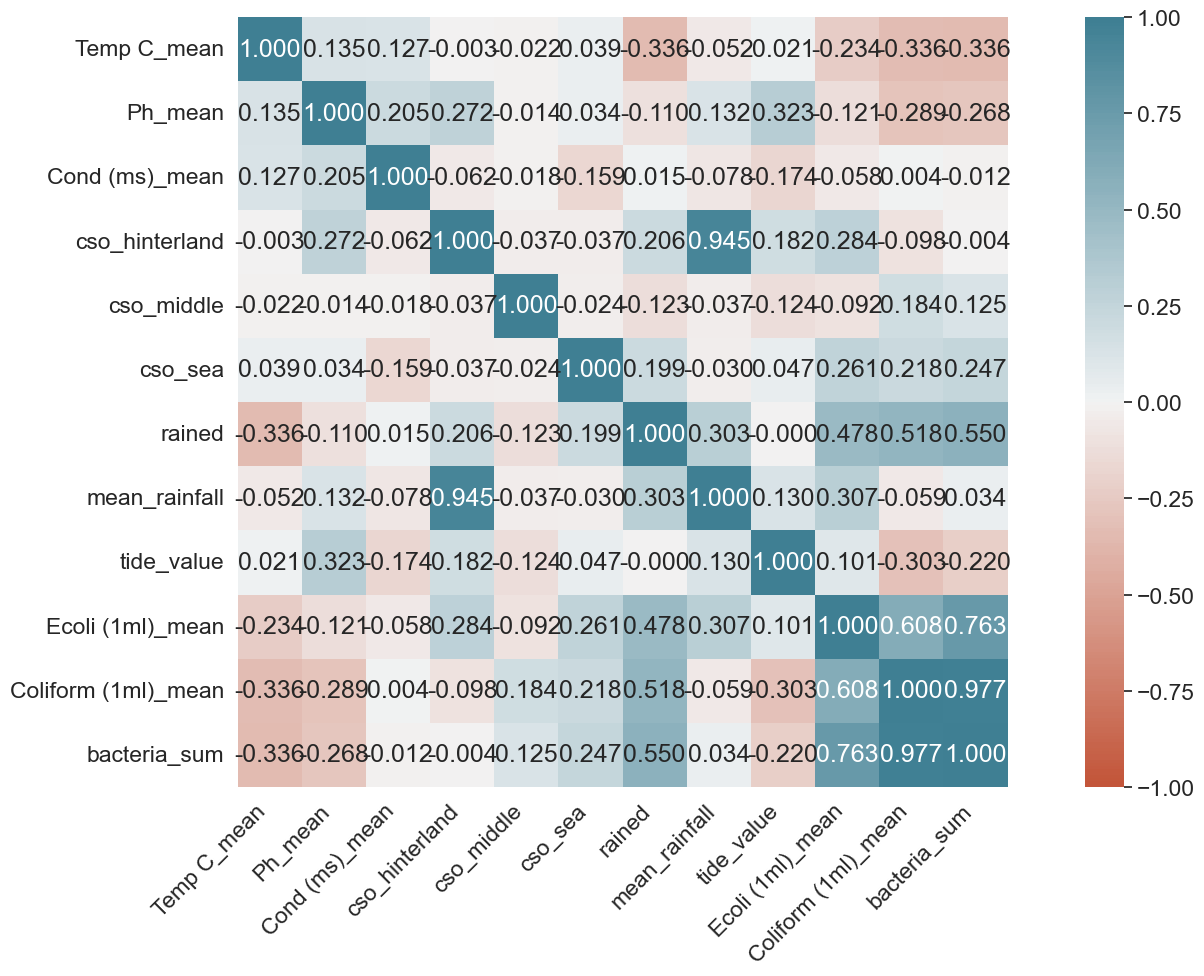

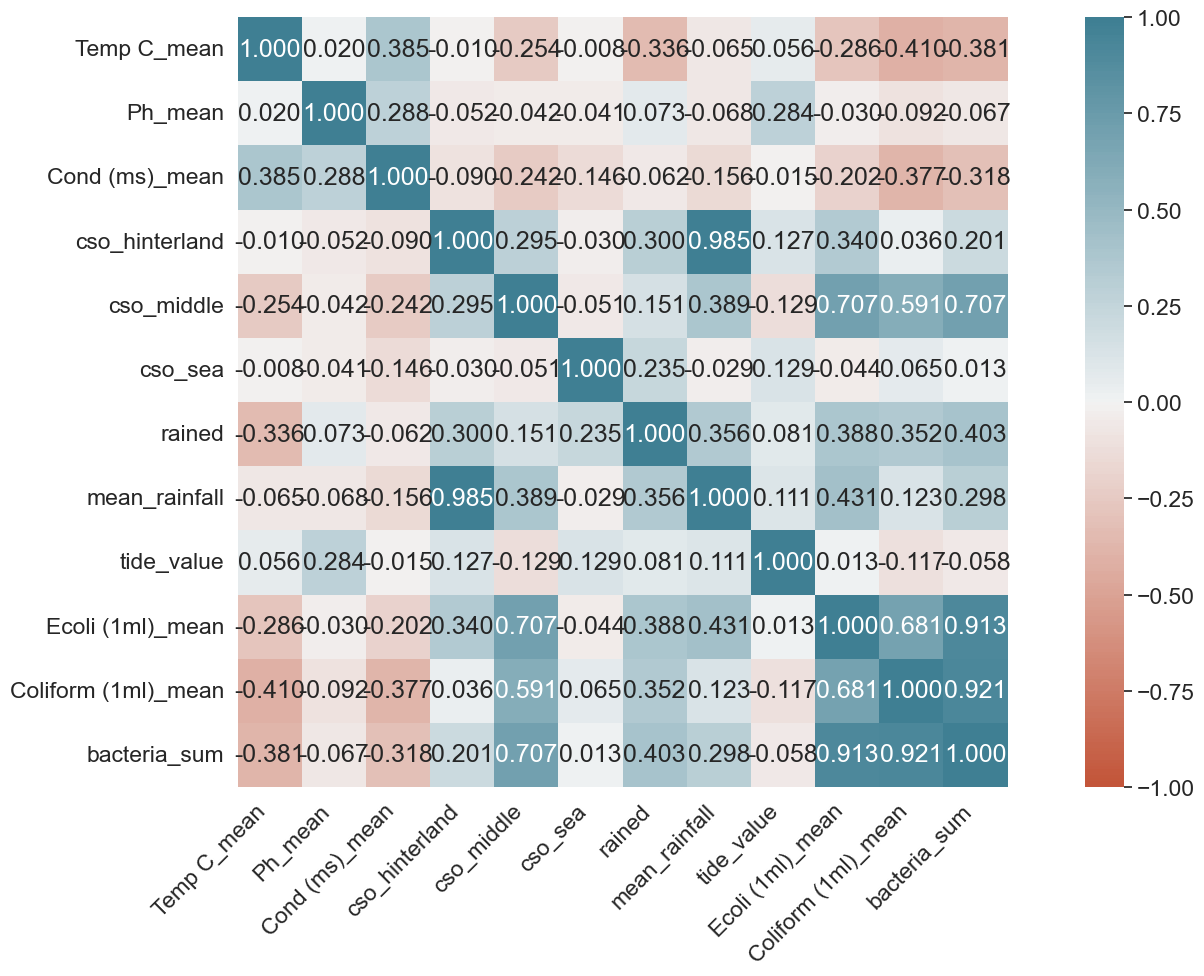

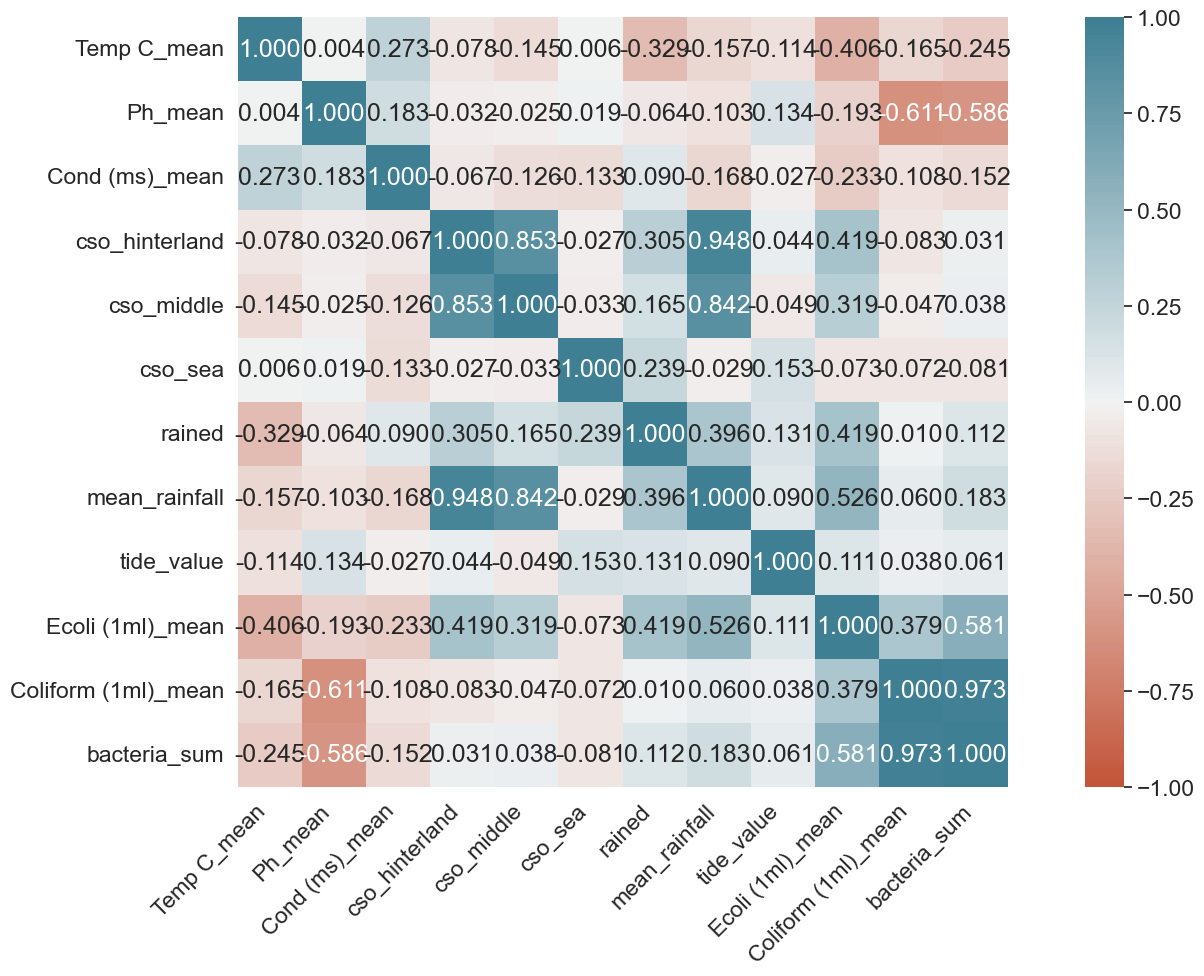

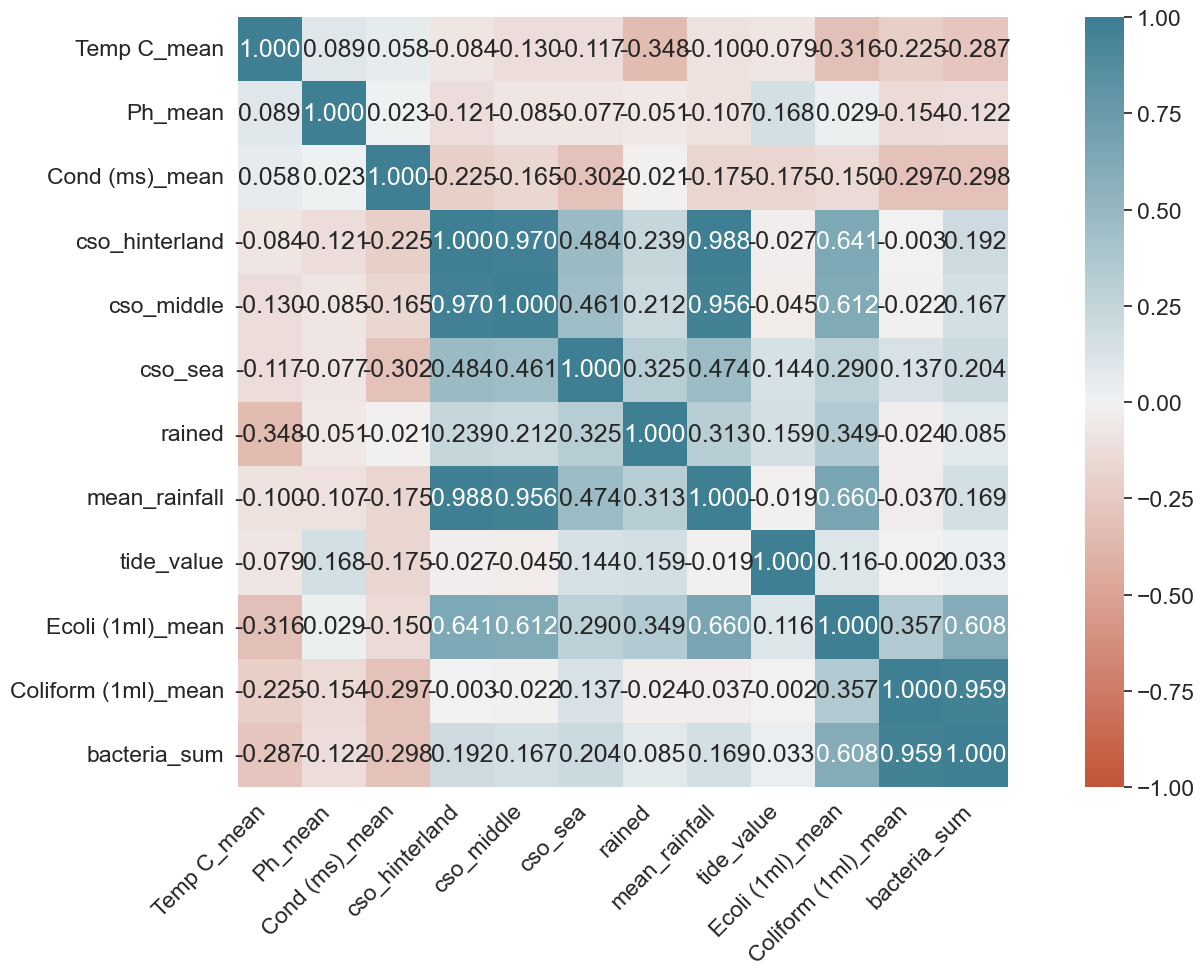

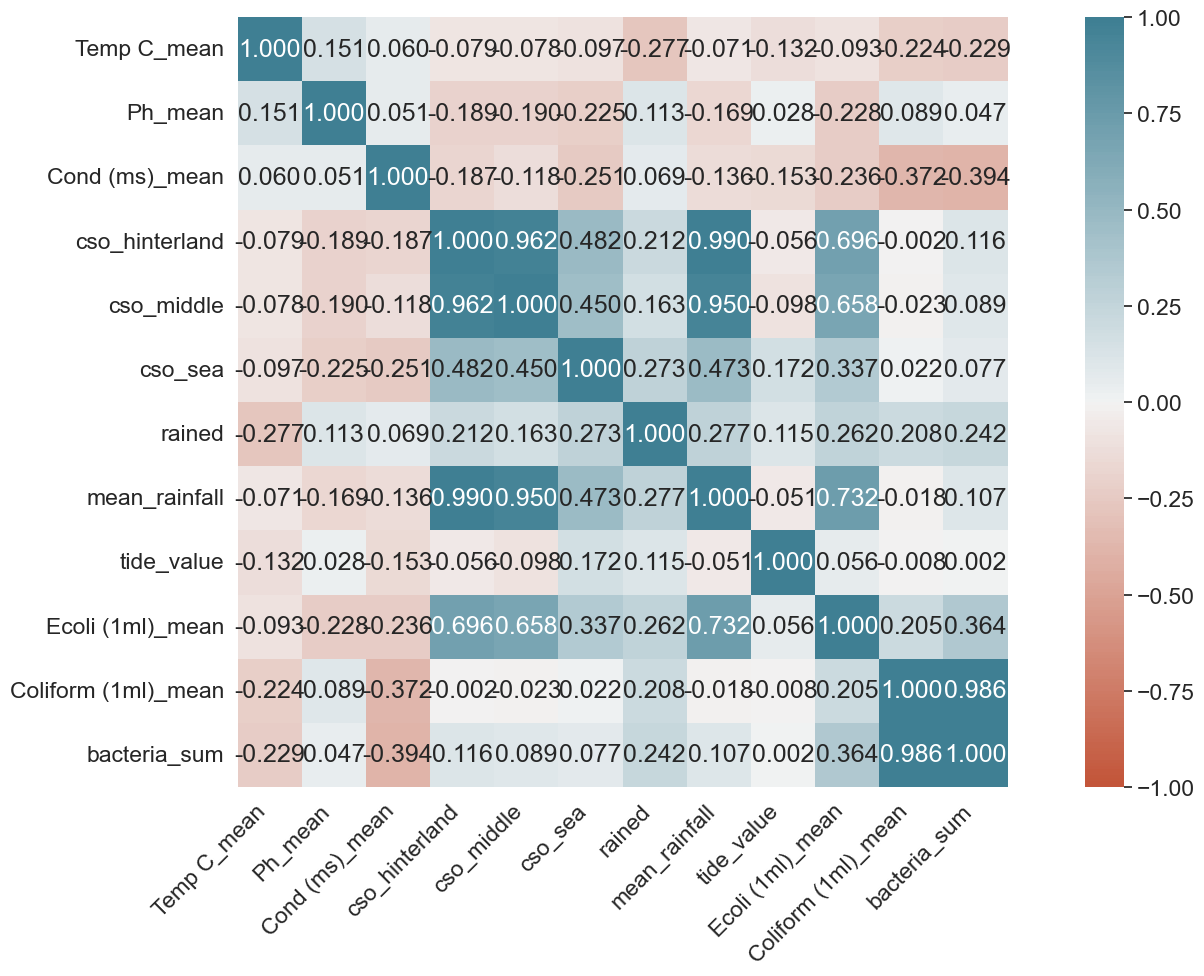

In [31]:
# Pearson, used for two quantitative continuous variables which have a linear relationship
# Spearman, used for two quantitative variables if the link is partially linear, or for one qualitative ordinal variable and one quantitative variable
# Kendall, often used for two qualitative ordinal variables

for site in site_dict:
    corr = site_dict[site][analyze_columns].corr(method="pearson")

    plt.figure(figsize=(20, 10))
    ax = sns.heatmap(
        corr,
        vmin=-1,
        vmax=1,
        center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        fmt=".3f",
    )
    ax.set_xticklabels(
        ax.get_xticklabels(), rotation=45, horizontalalignment="right"
    )

## Scatter Plots

<Figure size 1600x800 with 0 Axes>

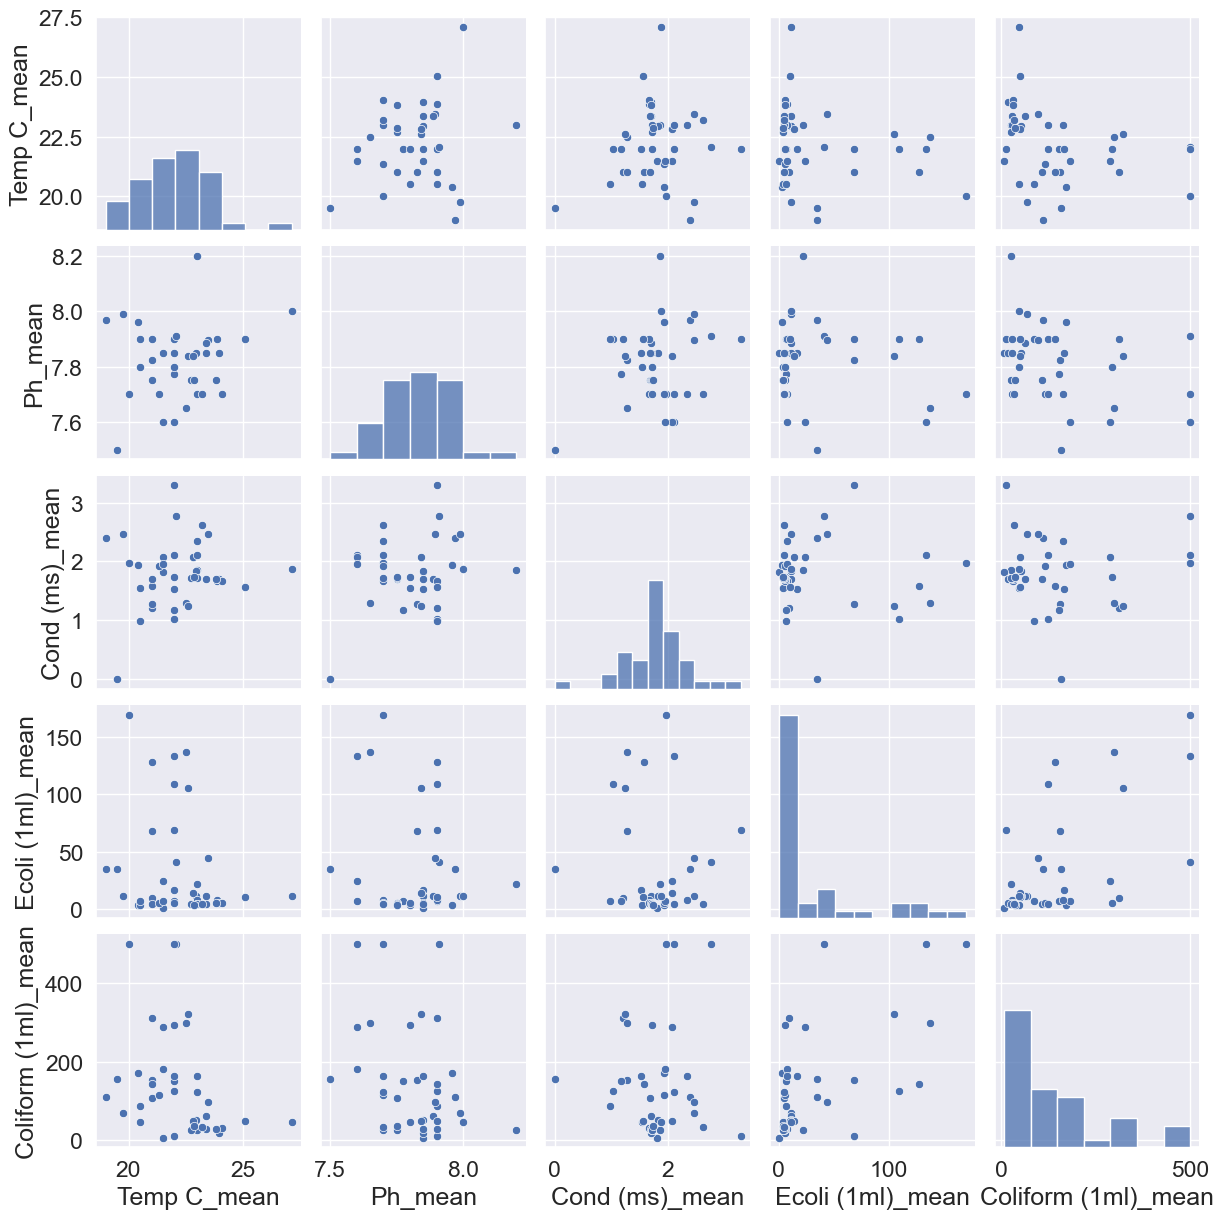

<Figure size 1600x800 with 0 Axes>

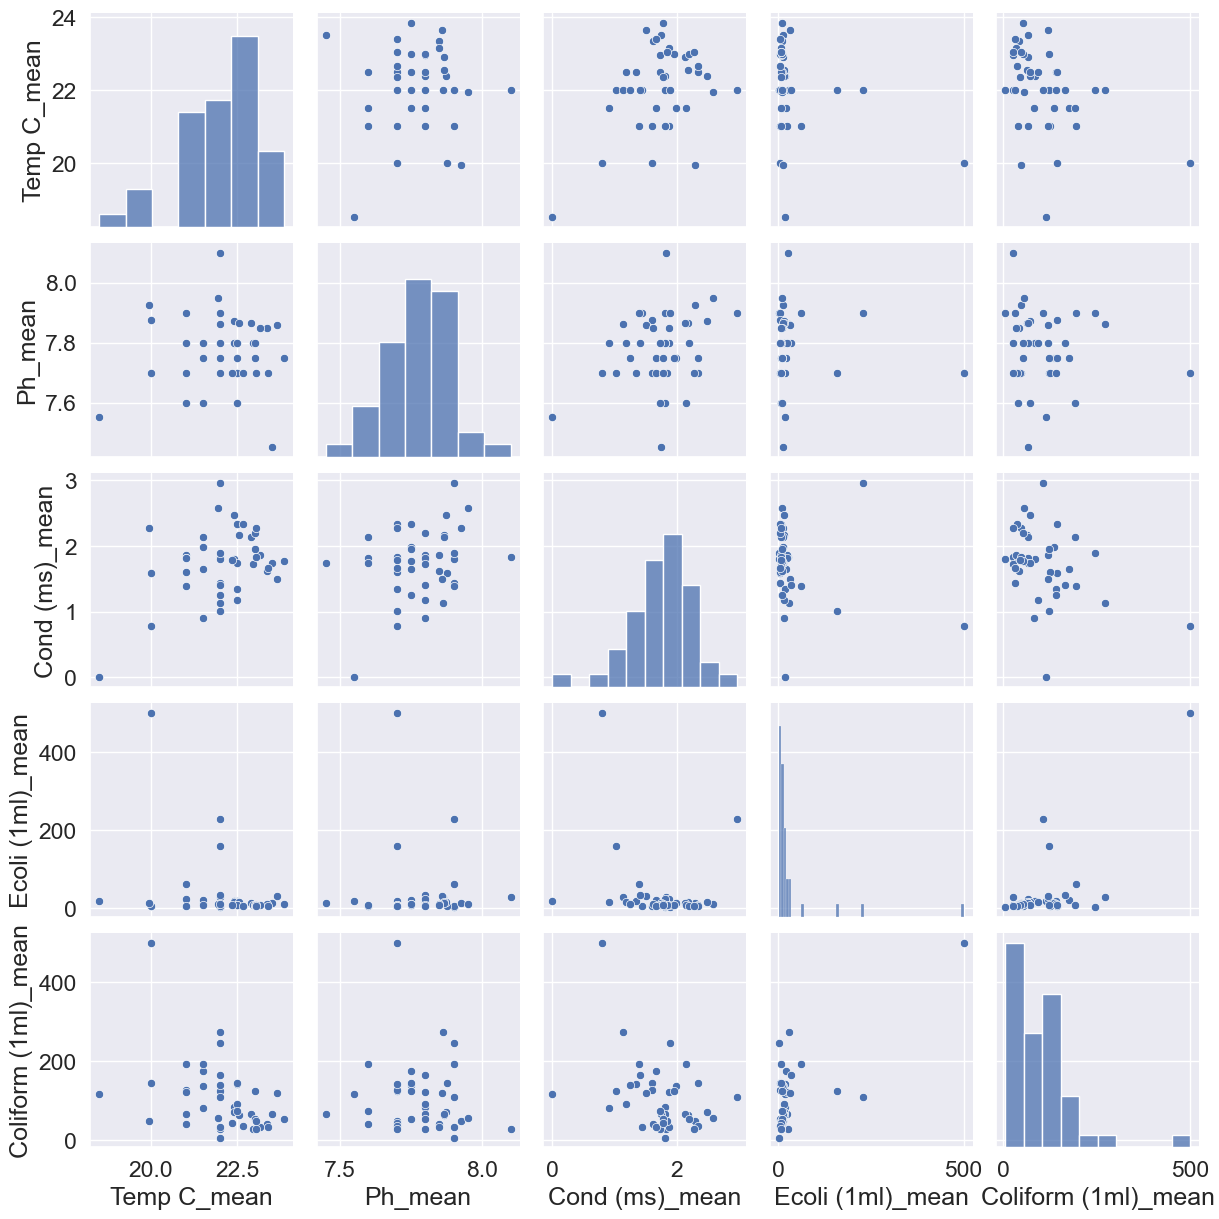

<Figure size 1600x800 with 0 Axes>

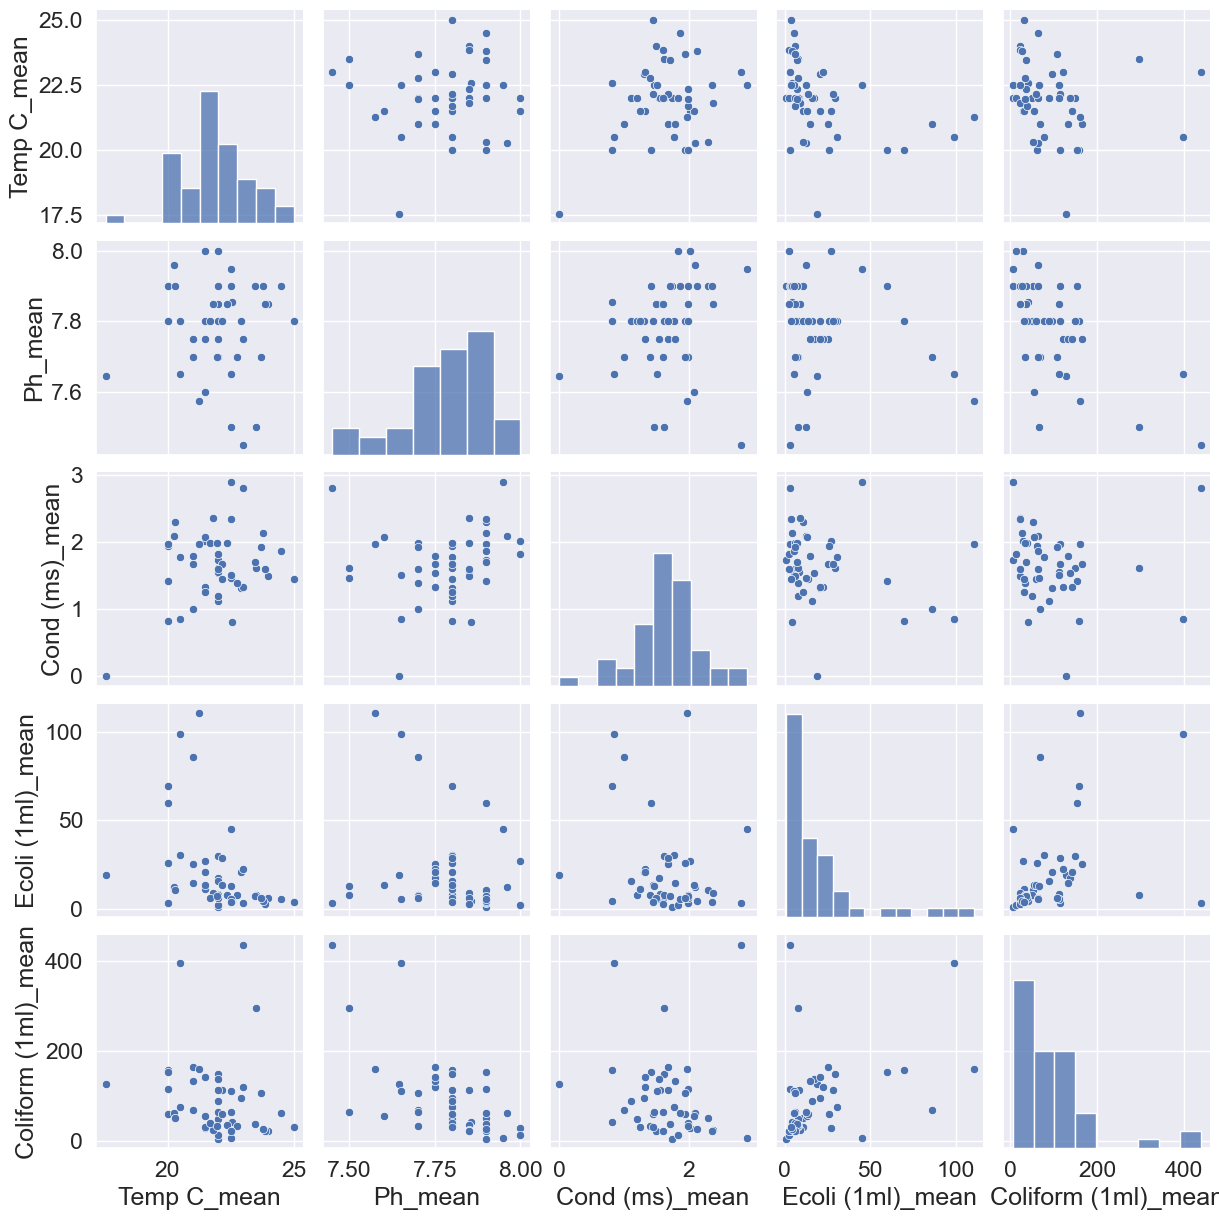

<Figure size 1600x800 with 0 Axes>

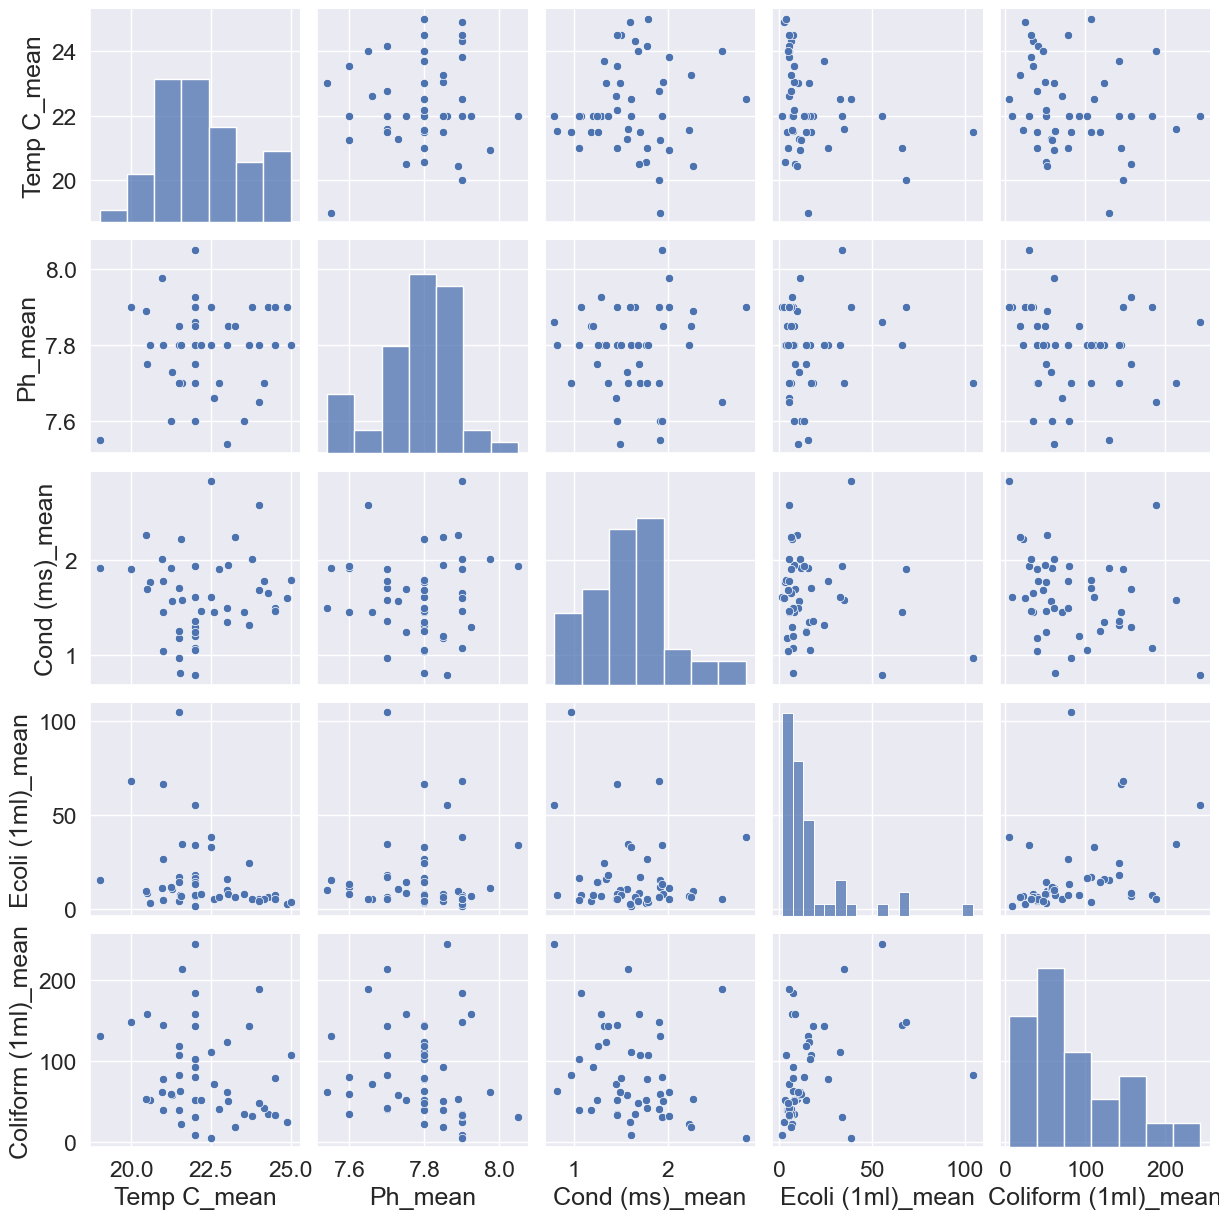

<Figure size 1600x800 with 0 Axes>

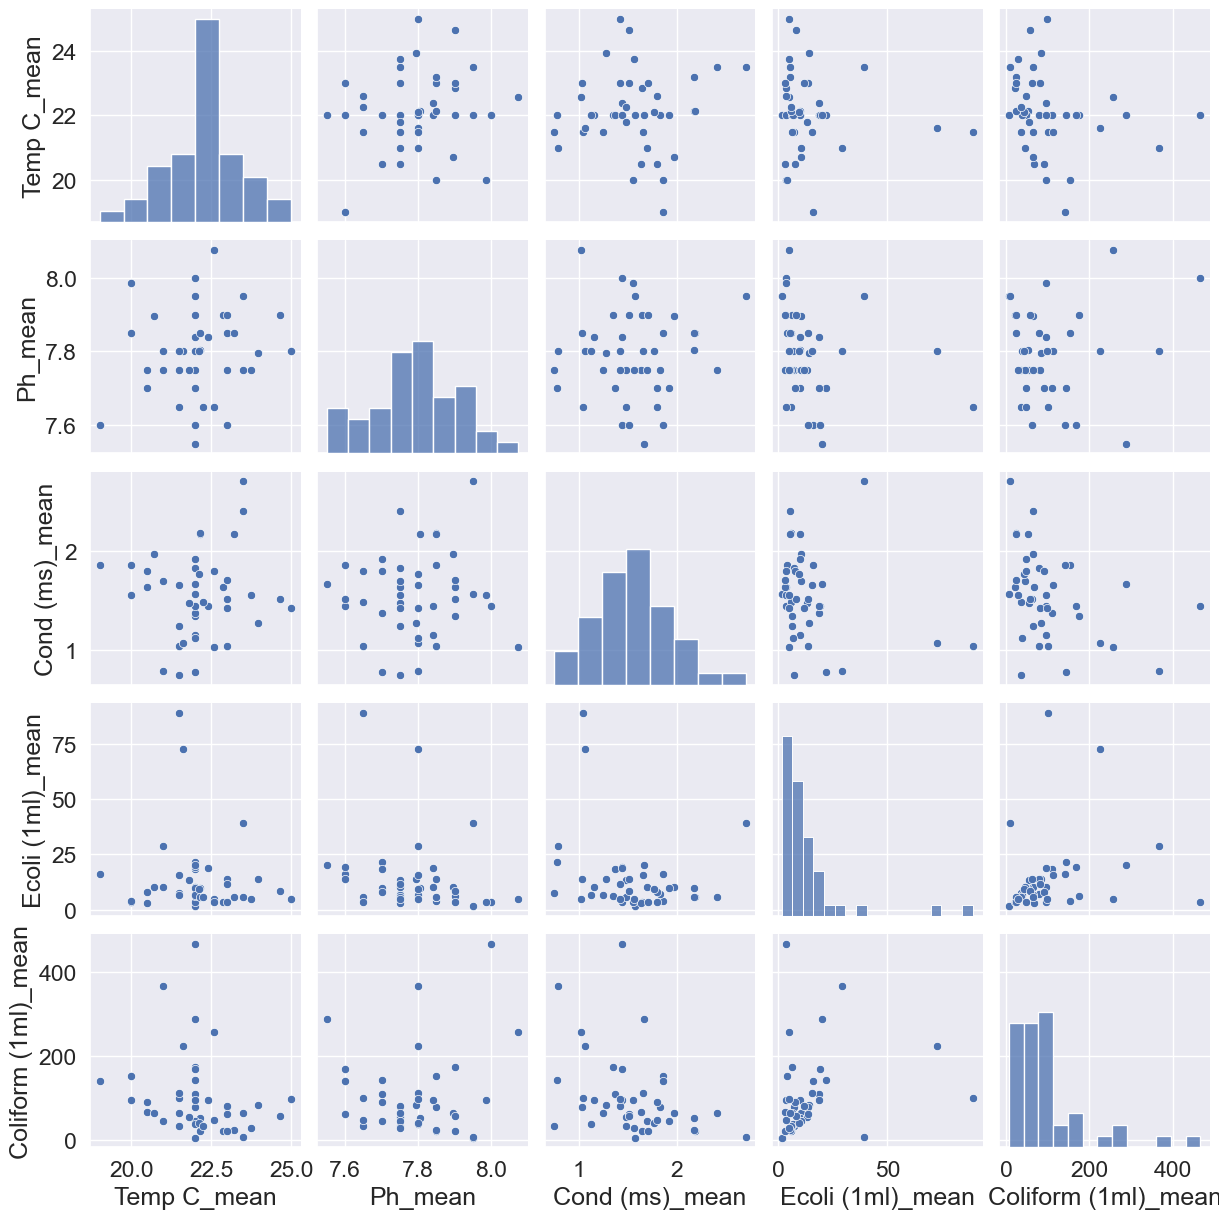

In [32]:
for site in site_dict:
    plt.figure(figsize=(20, 10), dpi=80)
    plot = sns.pairplot(site_dict[site][boxplot_columns])
    

### Conductivity vs Tides

In [33]:
cols = [
    "Cond (ms)_mean",
    "tide_value",
]

<Figure size 1500x750 with 0 Axes>

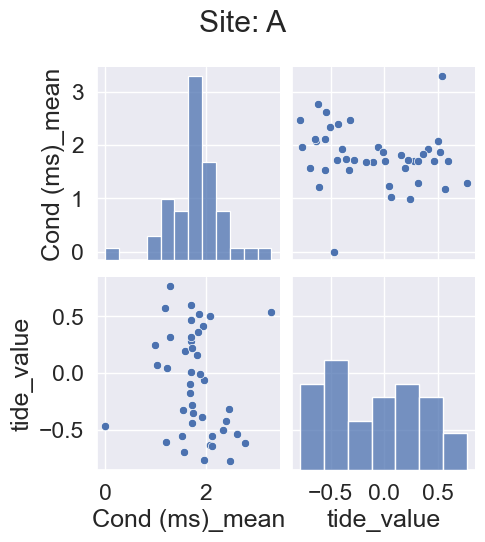

<Figure size 1500x750 with 0 Axes>

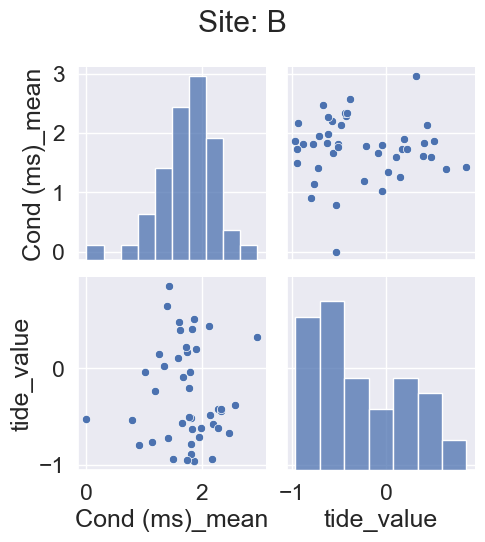

<Figure size 1500x750 with 0 Axes>

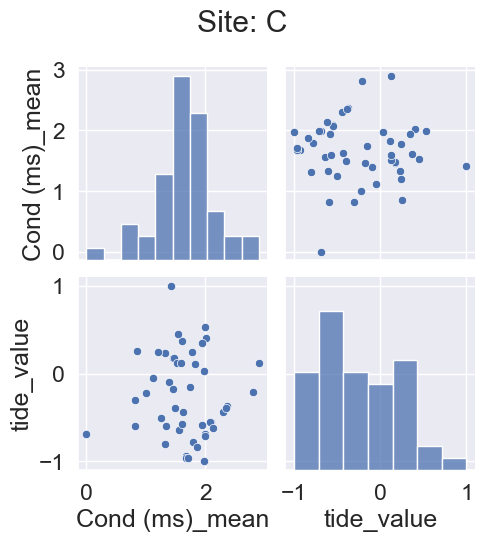

<Figure size 1500x750 with 0 Axes>

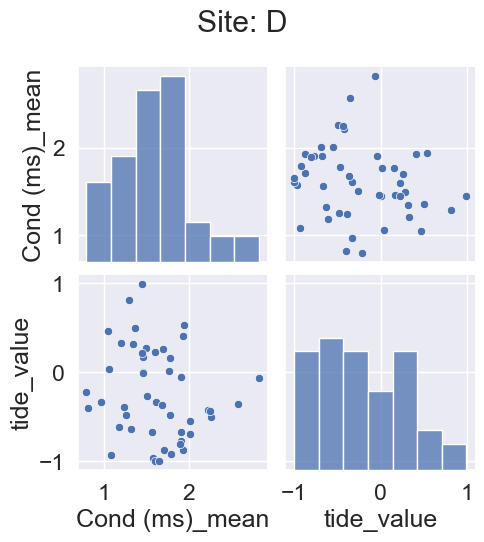

<Figure size 1500x750 with 0 Axes>

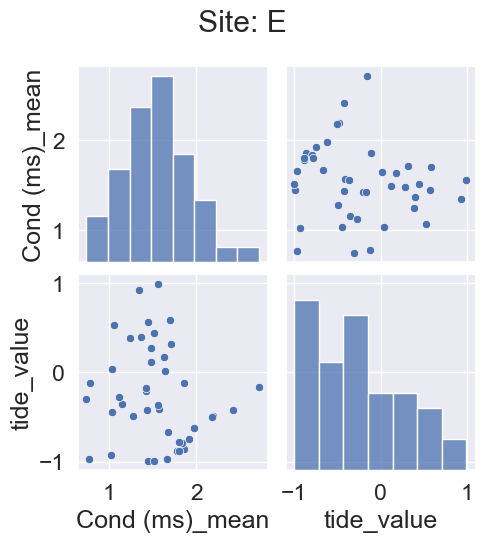

In [34]:
for site in site_dict:
    plt.figure(figsize=(15, 7.5))
    plot = sns.pairplot(data=site_dict[site][cols])
    plot.figure.suptitle("Site: " + site, y=1.08)

## Boxplots

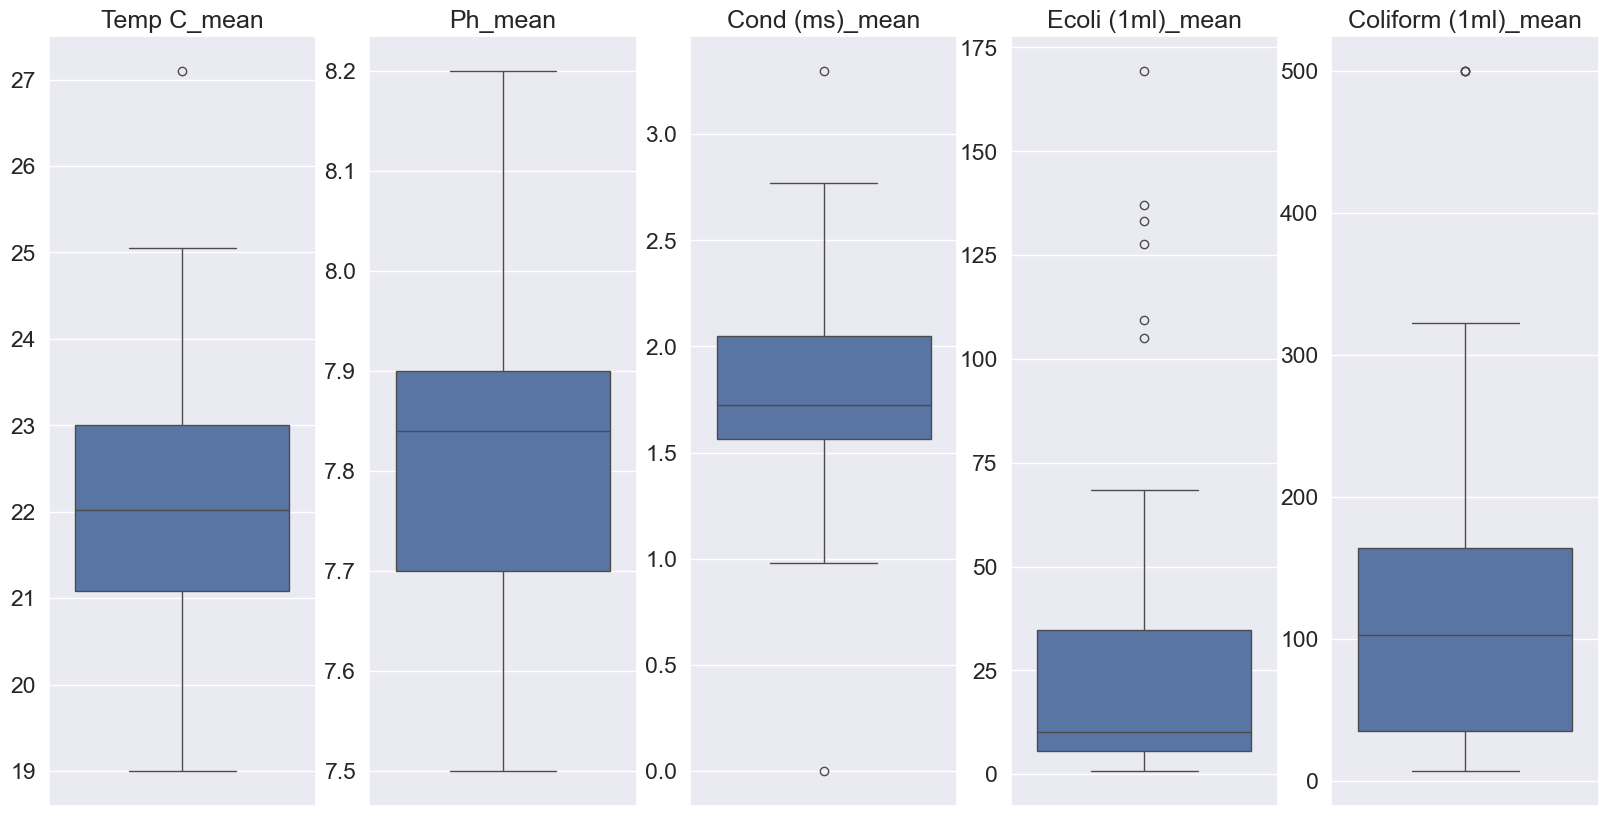

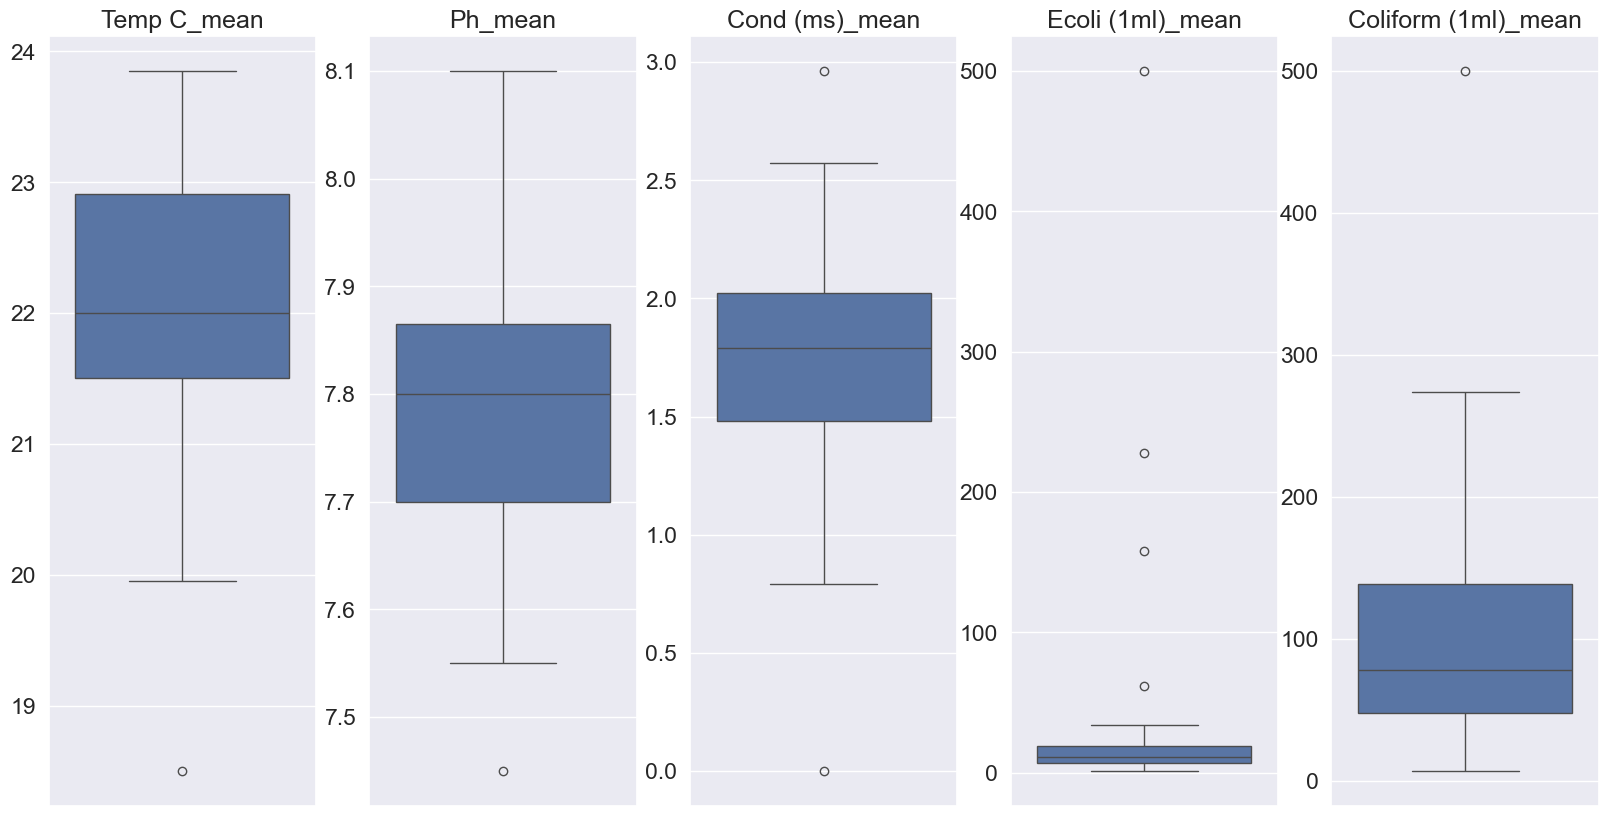

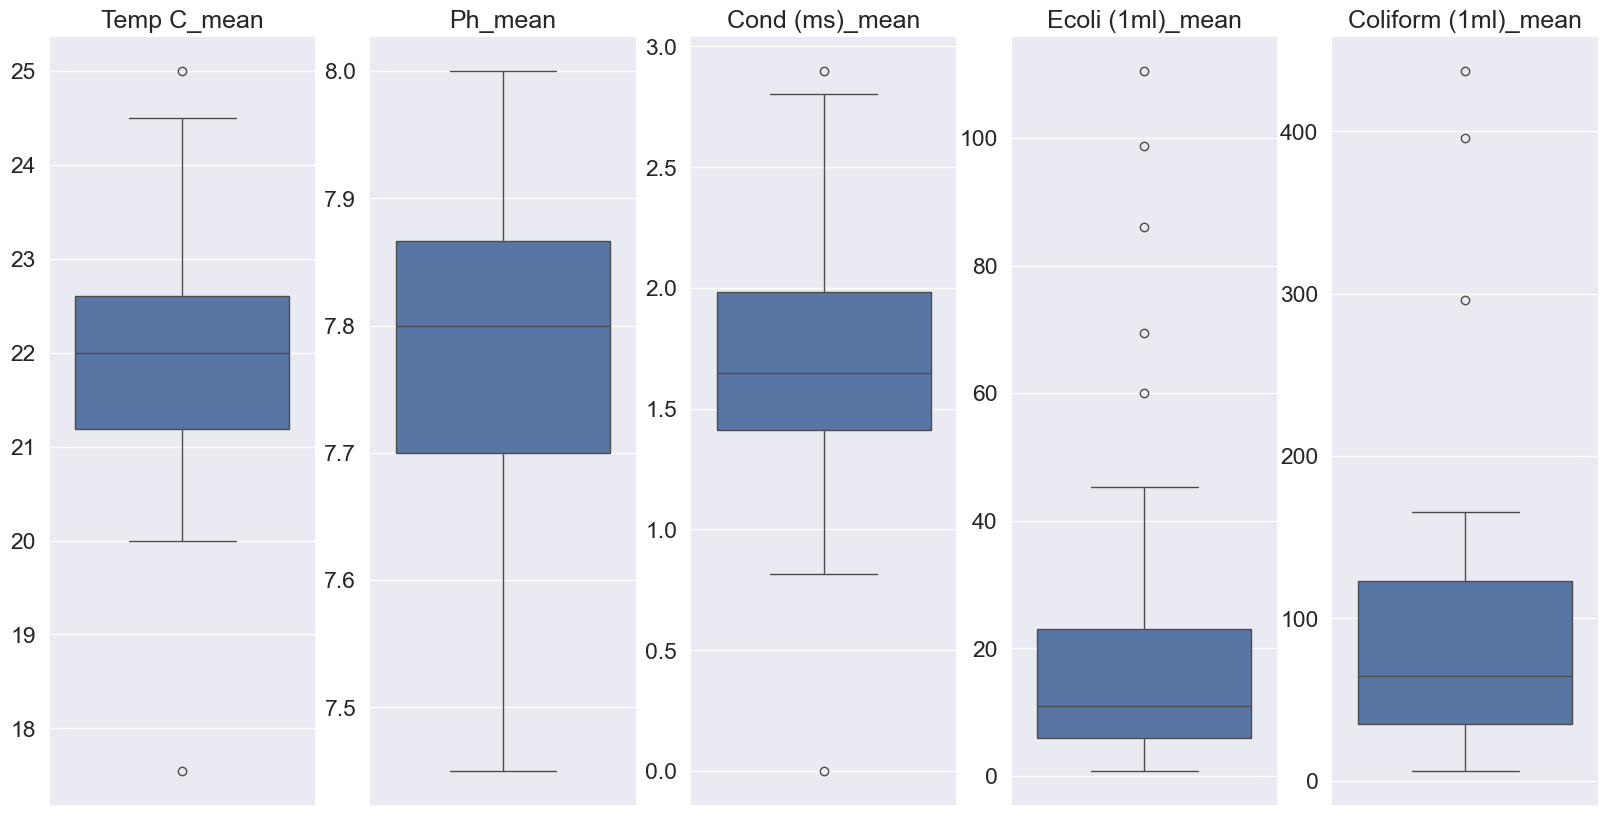

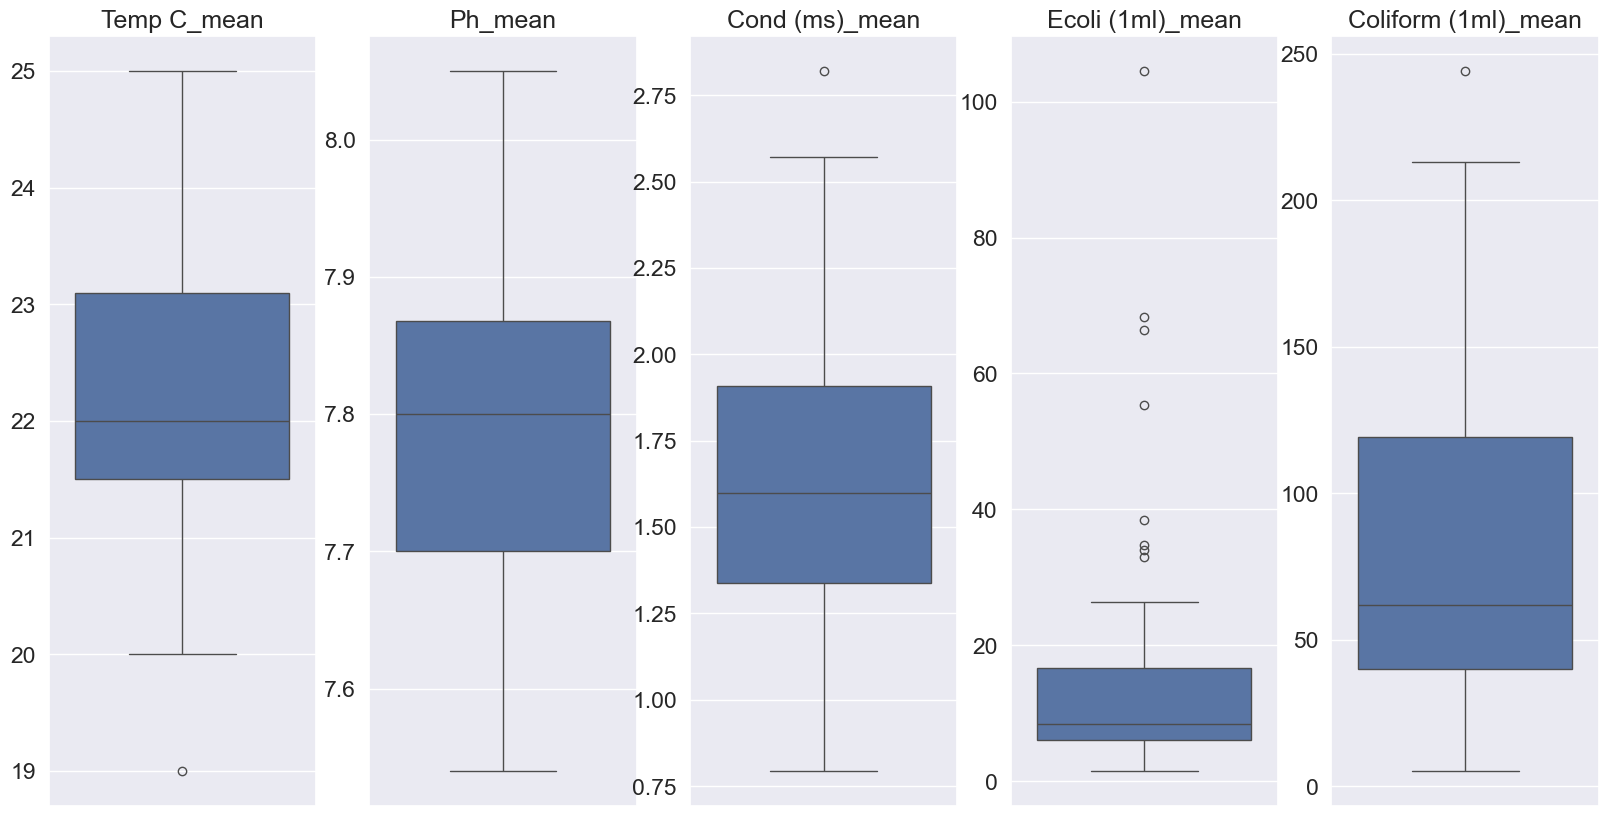

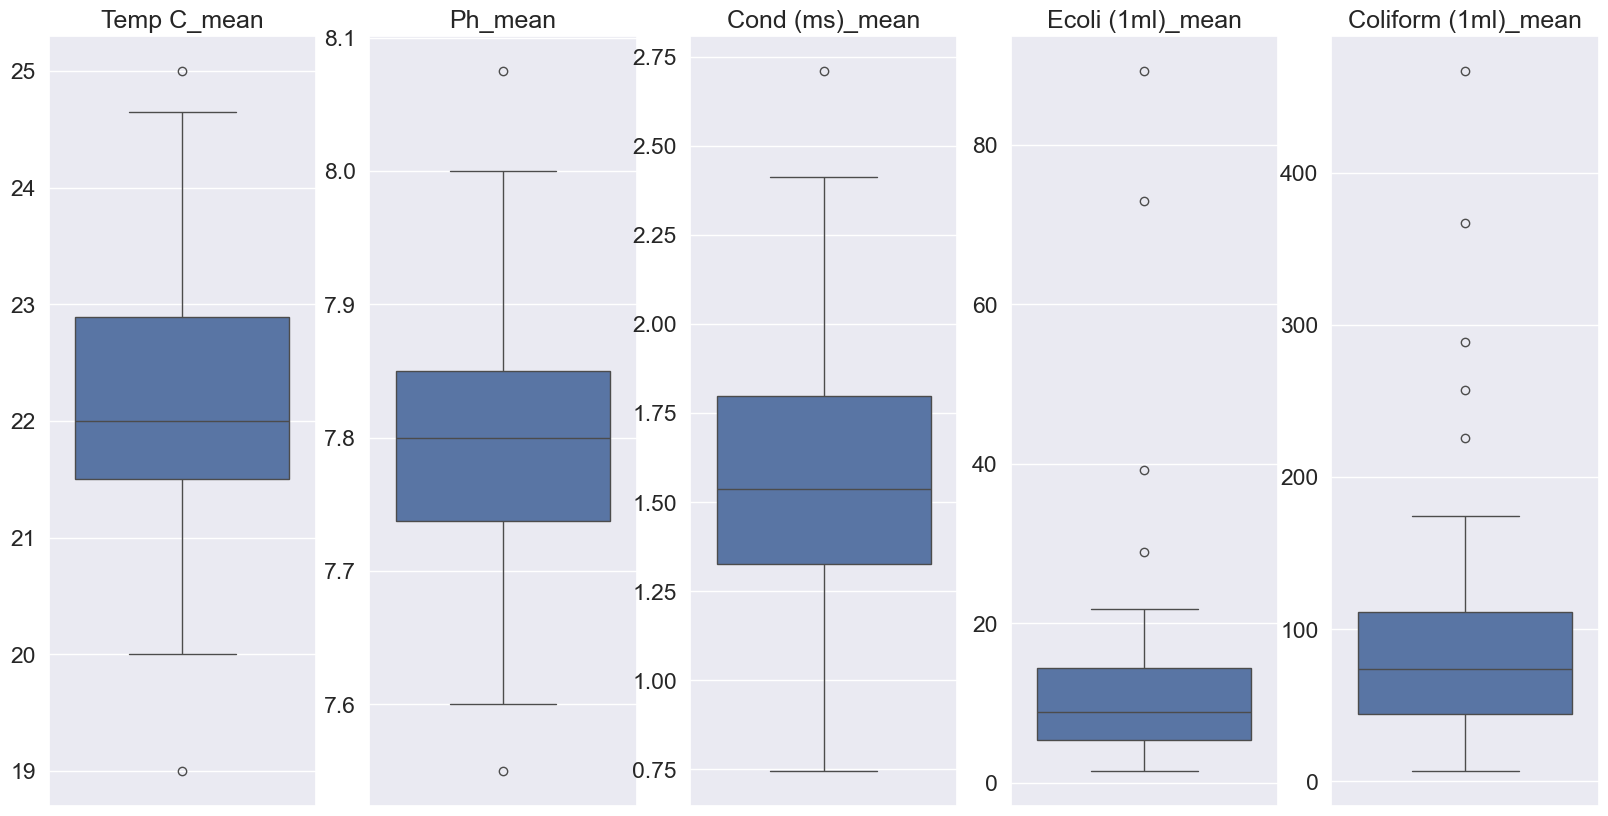

In [35]:
for site in site_dict:
    fig, axs = plt.subplots(1, len(boxplot_columns), figsize=(20, 10))
    # sns.set_theme(font_scale=1.5)
    for col in boxplot_columns:
        sns.boxplot(
            y=site_dict[site][col],
            orient="v",
            ax=axs[boxplot_columns.index(col)],
        )
        axs[boxplot_columns.index(col)].set_title(col)
        # remove y axis label
        axs[boxplot_columns.index(col)].set_ylabel("")

## Timeseries

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


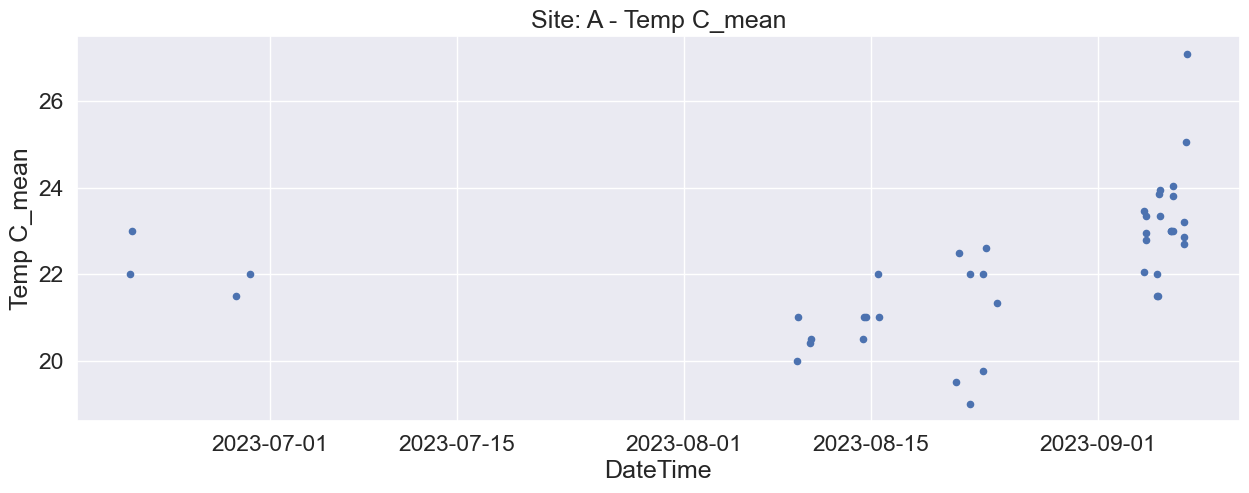

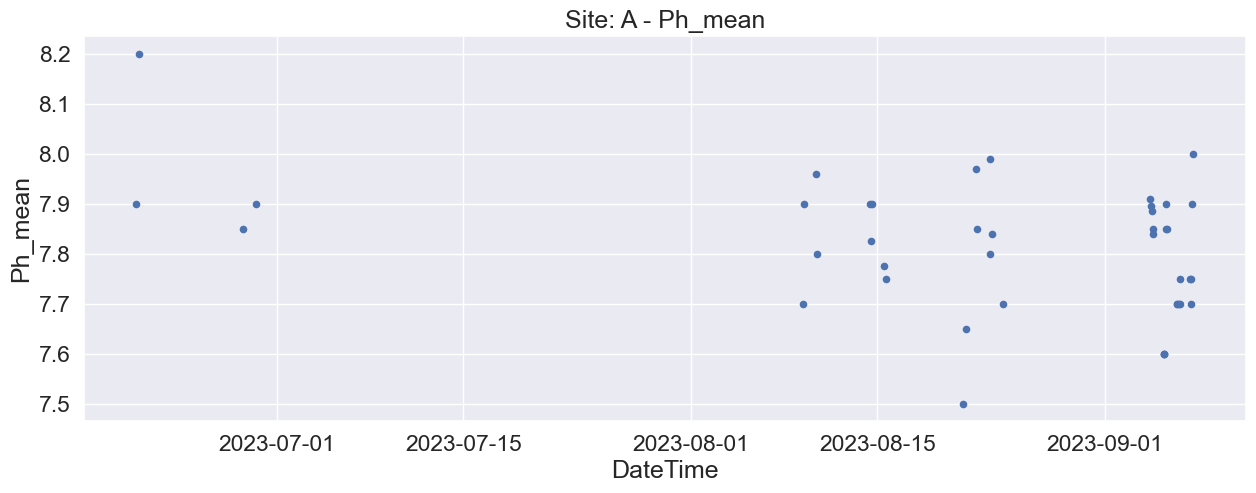

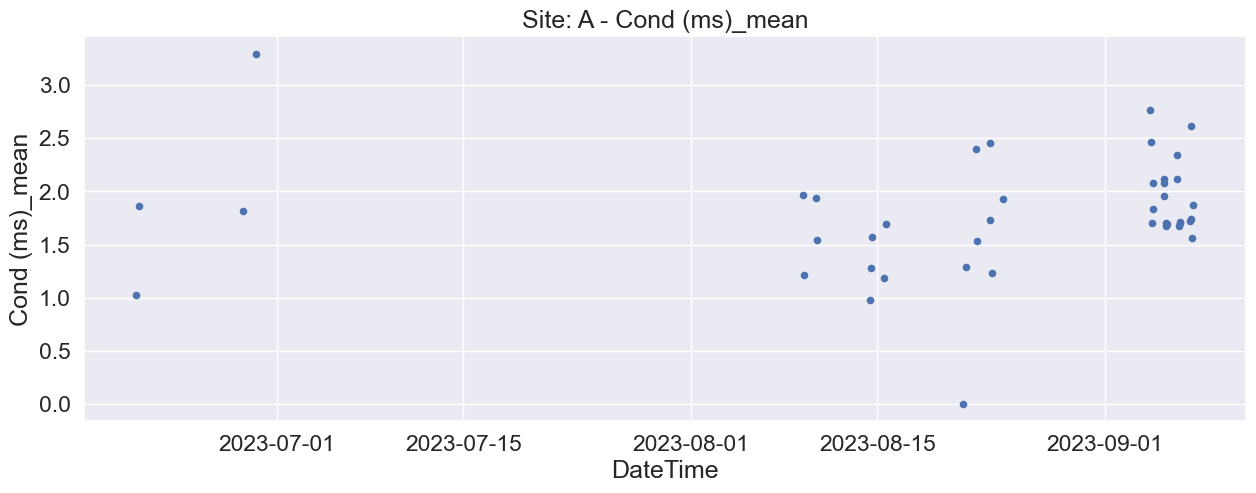

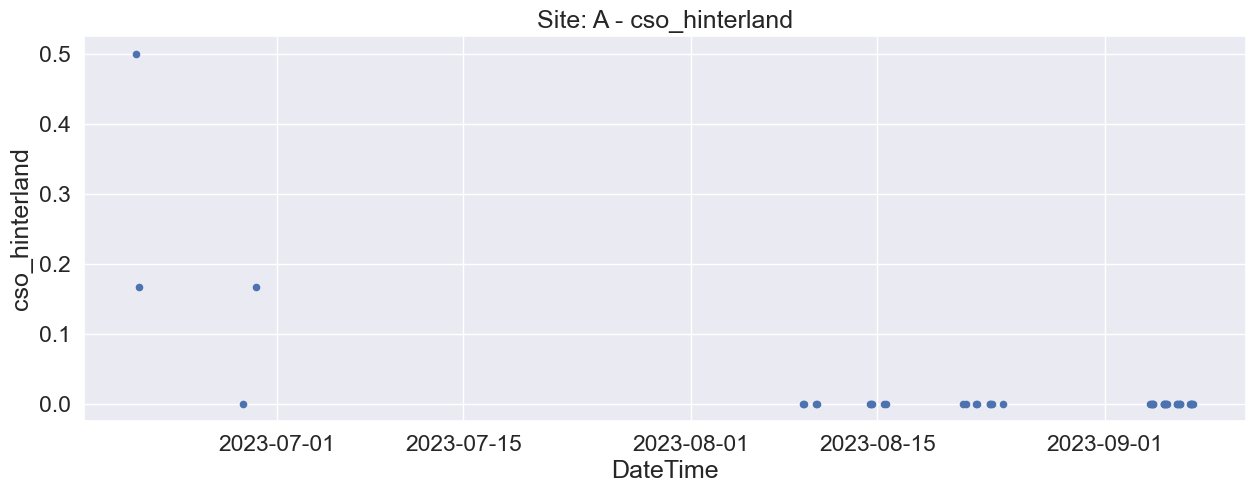

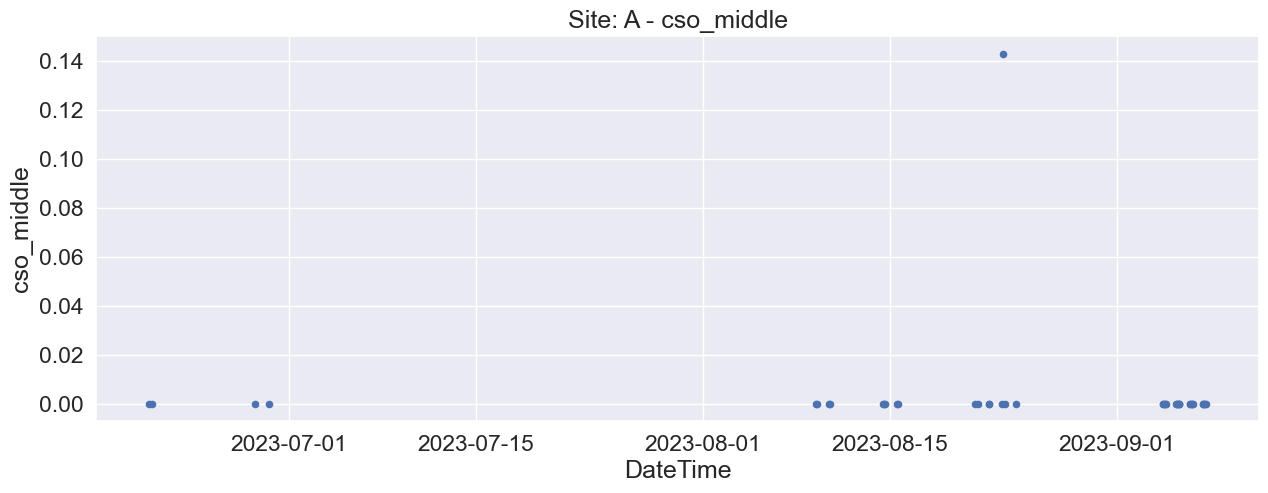

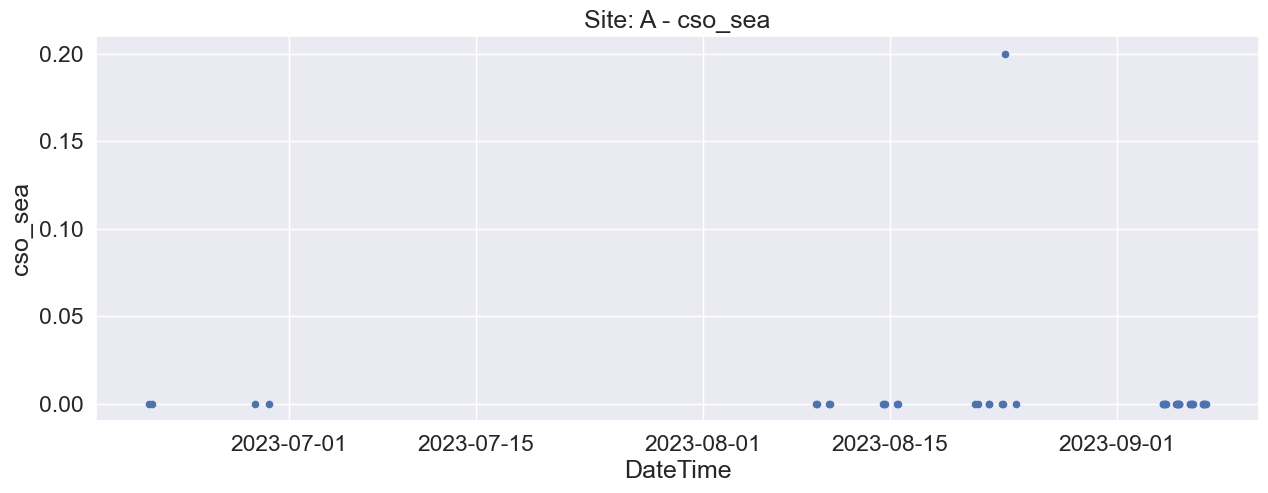

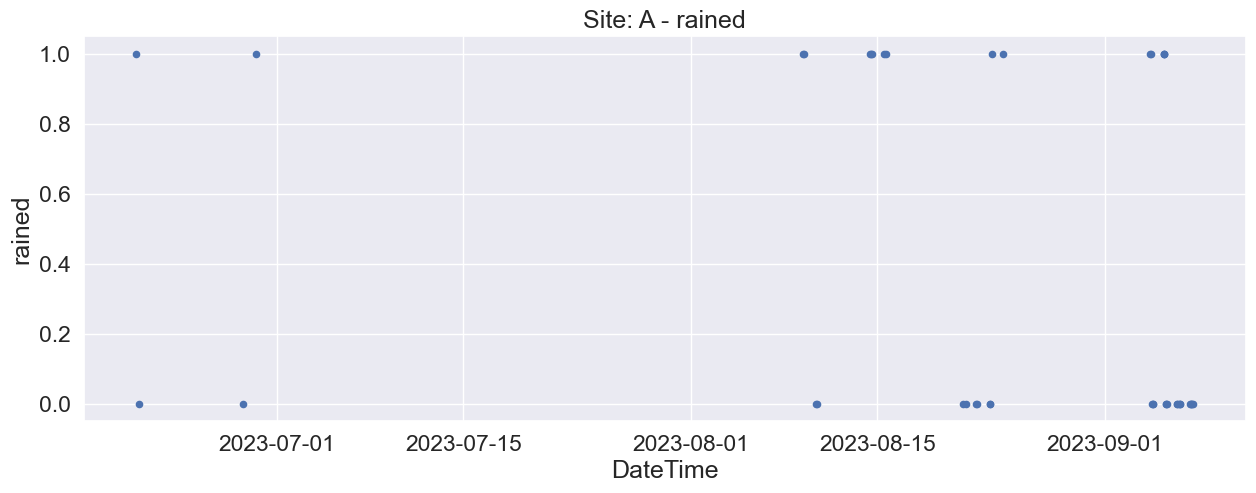

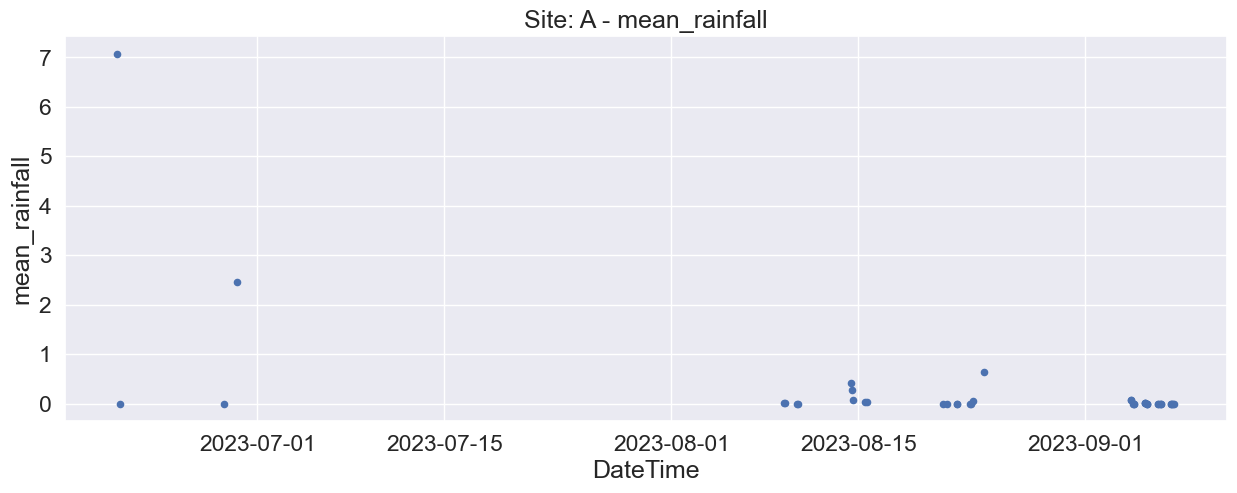

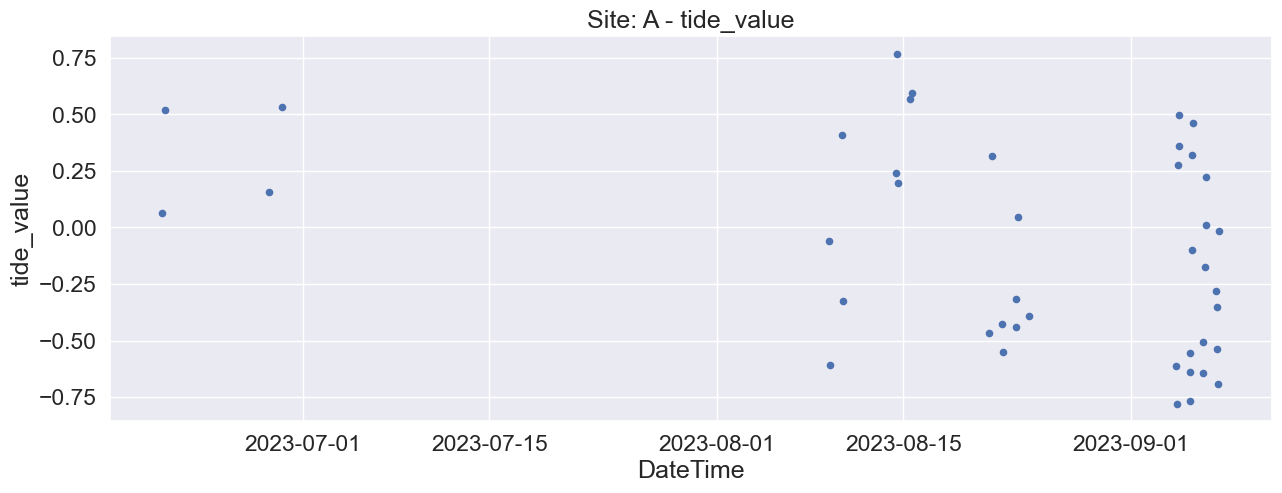

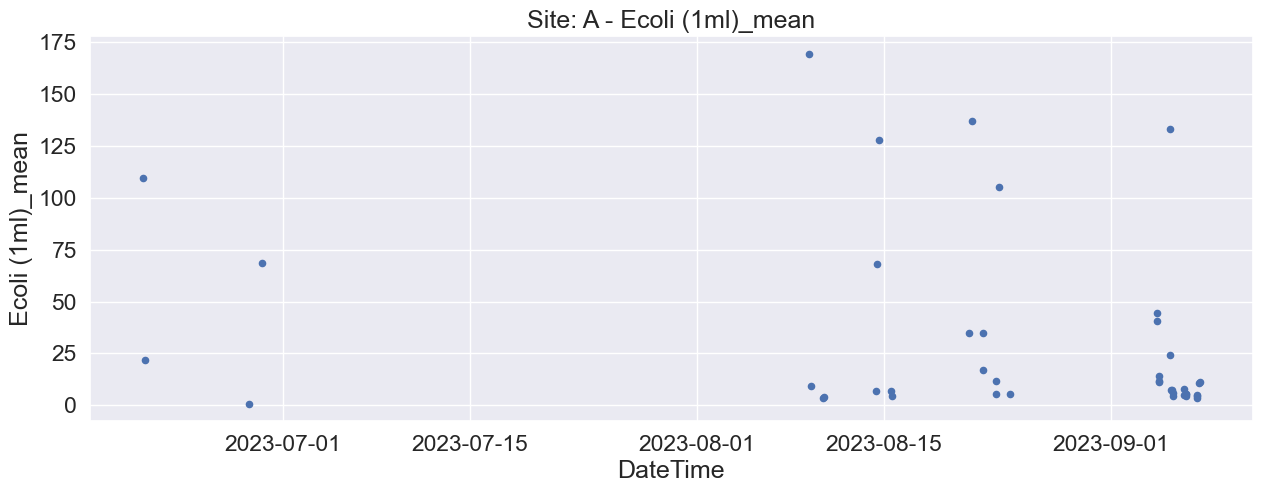

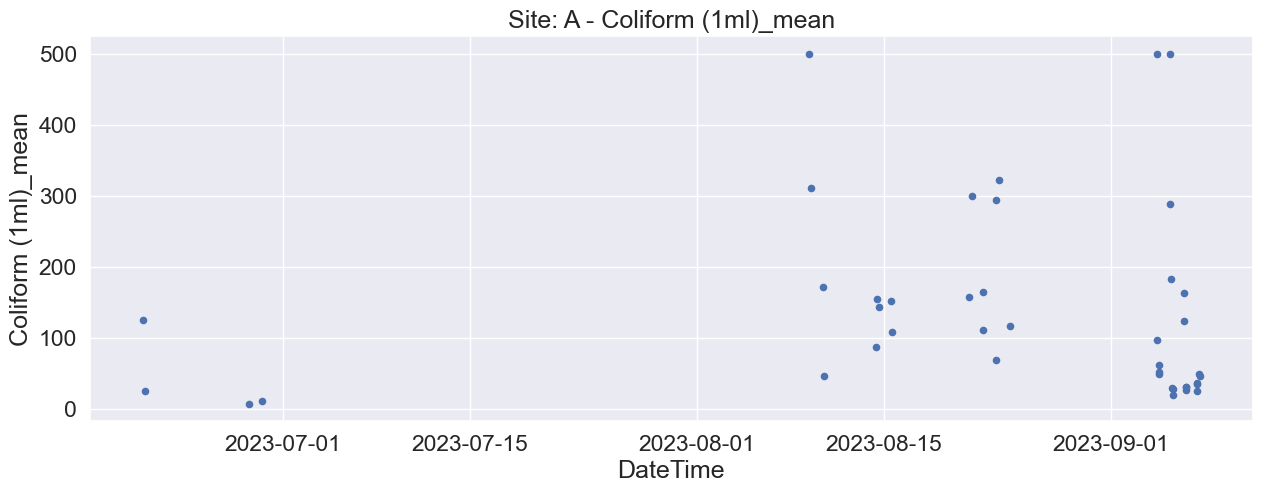

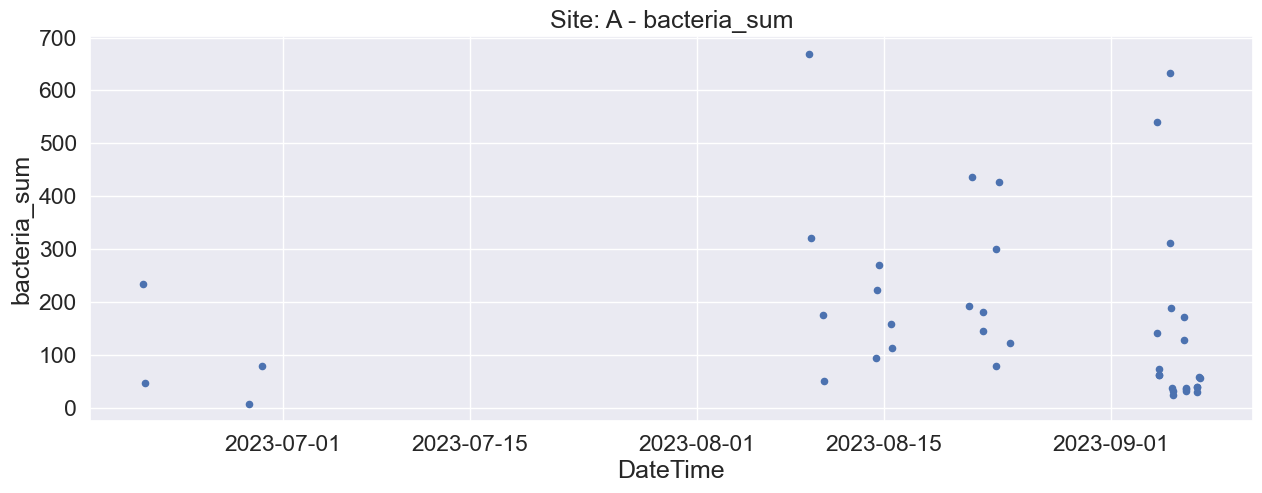

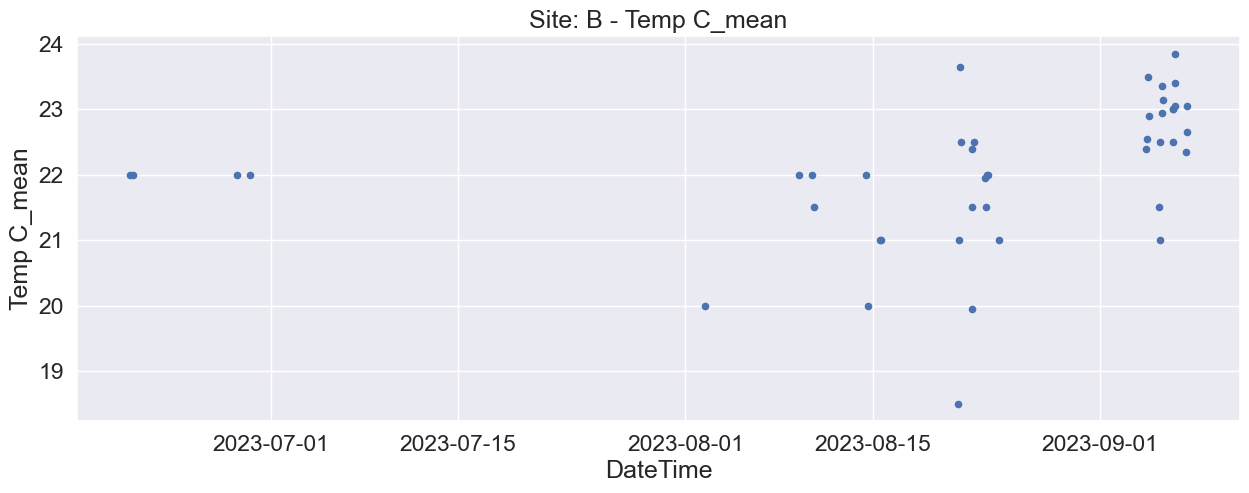

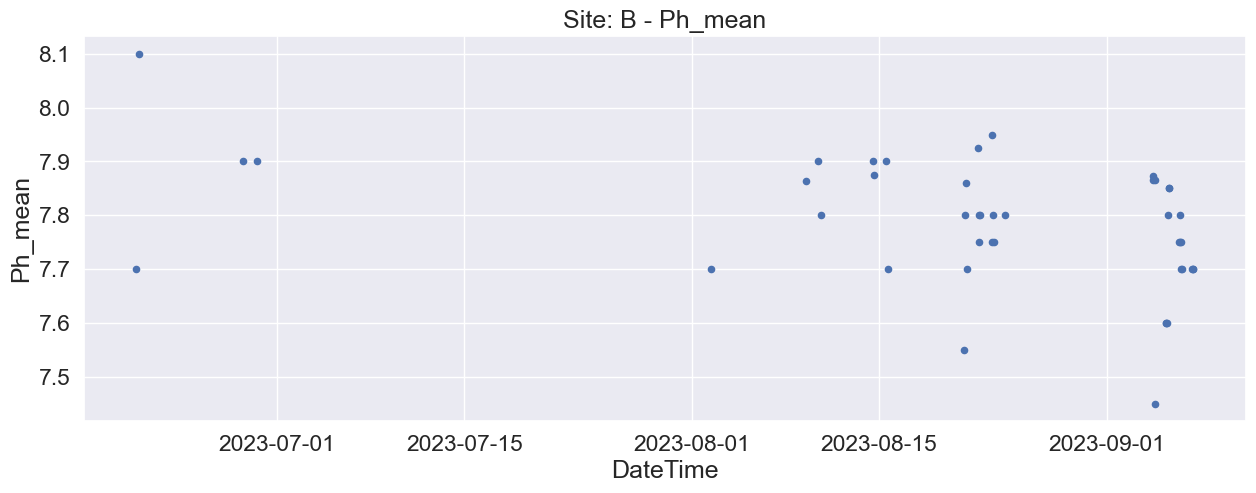

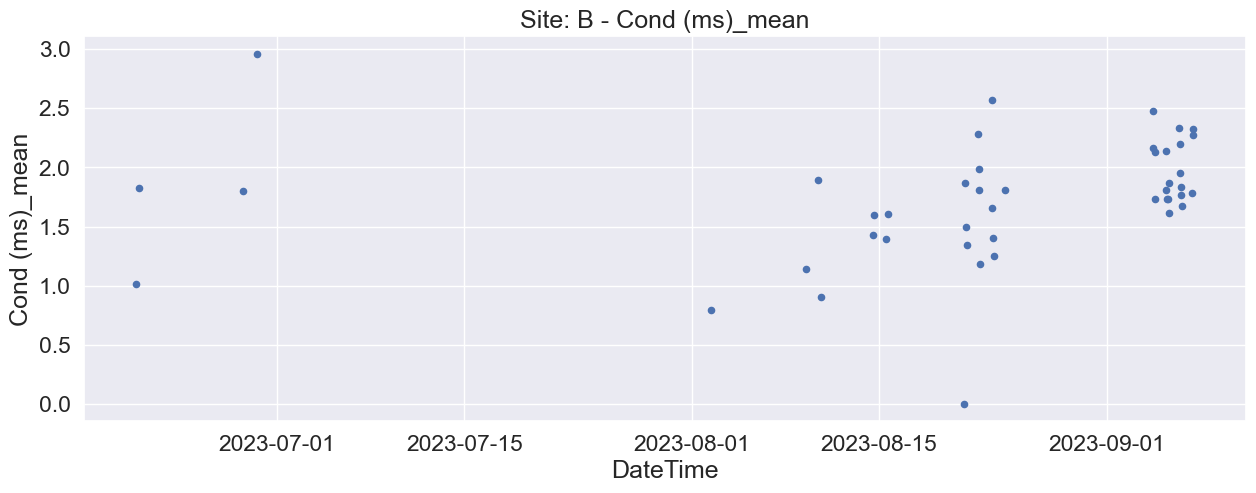

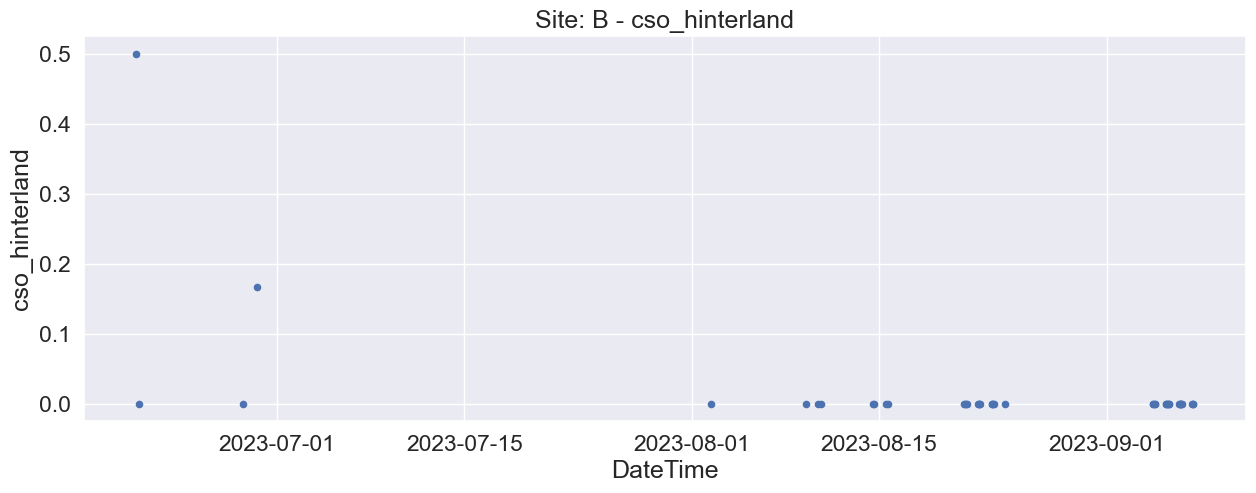

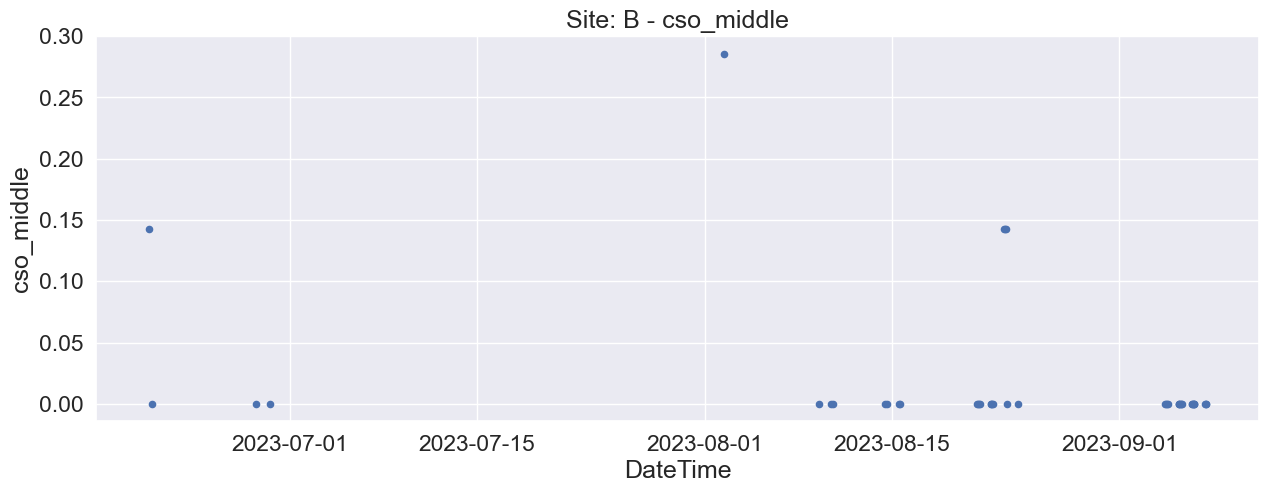

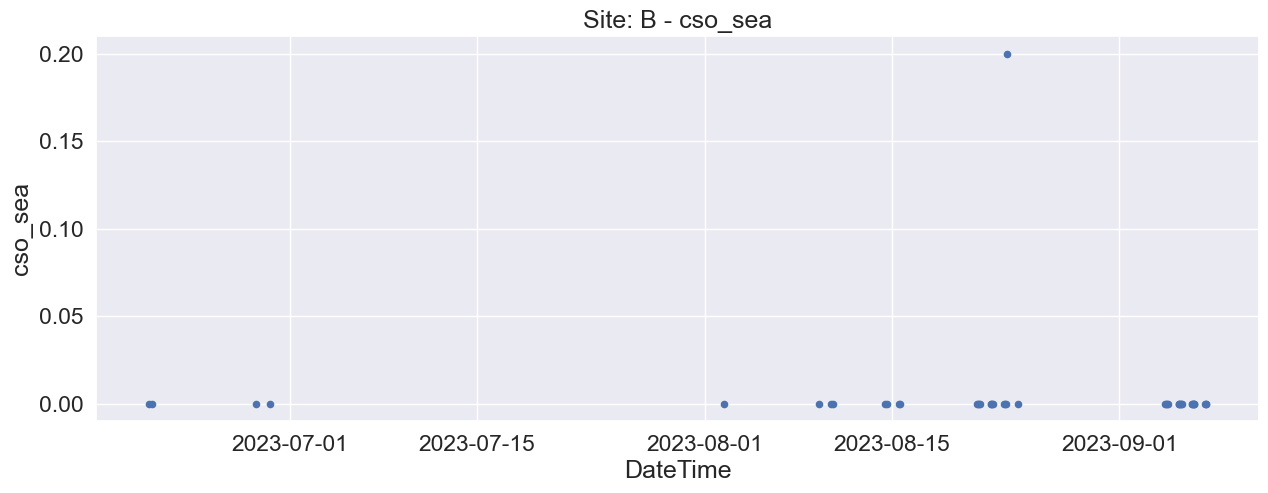

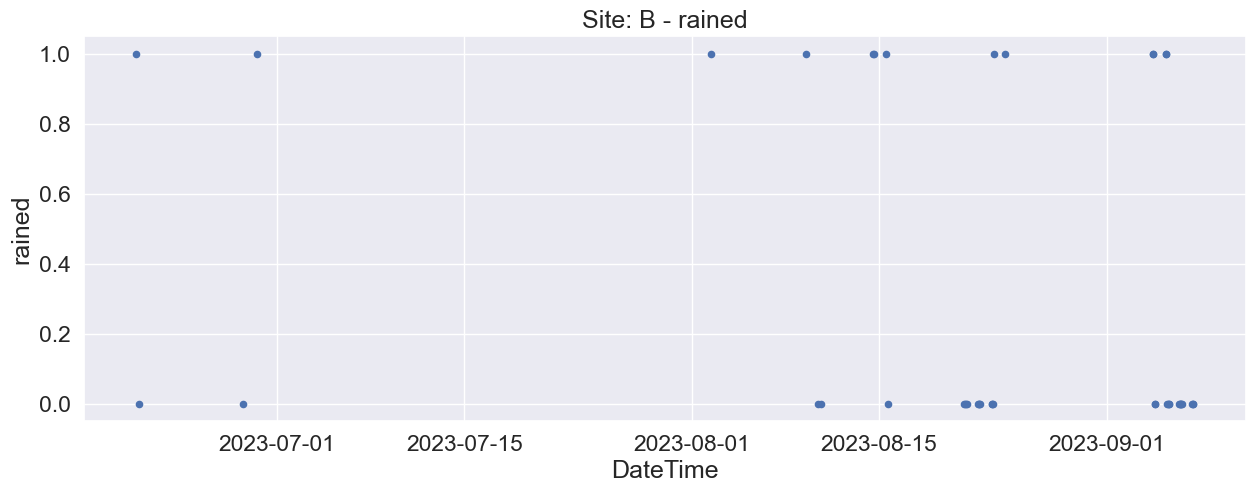

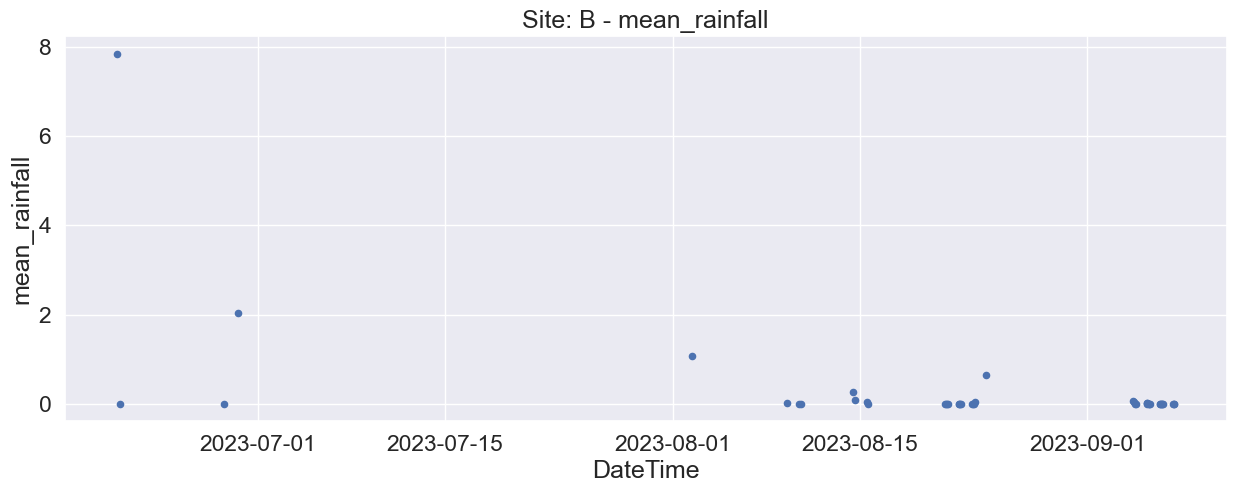

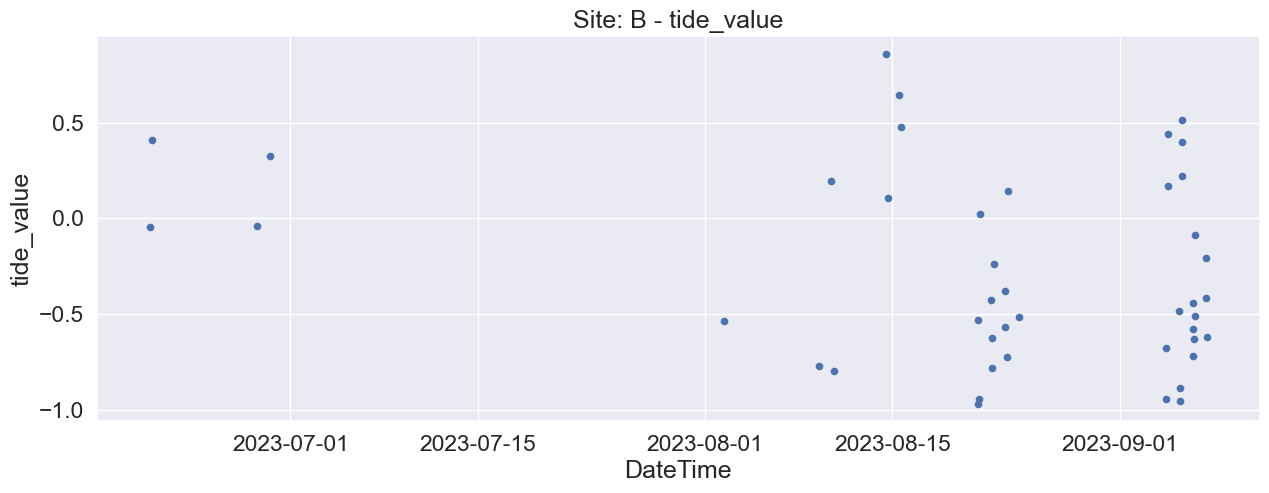

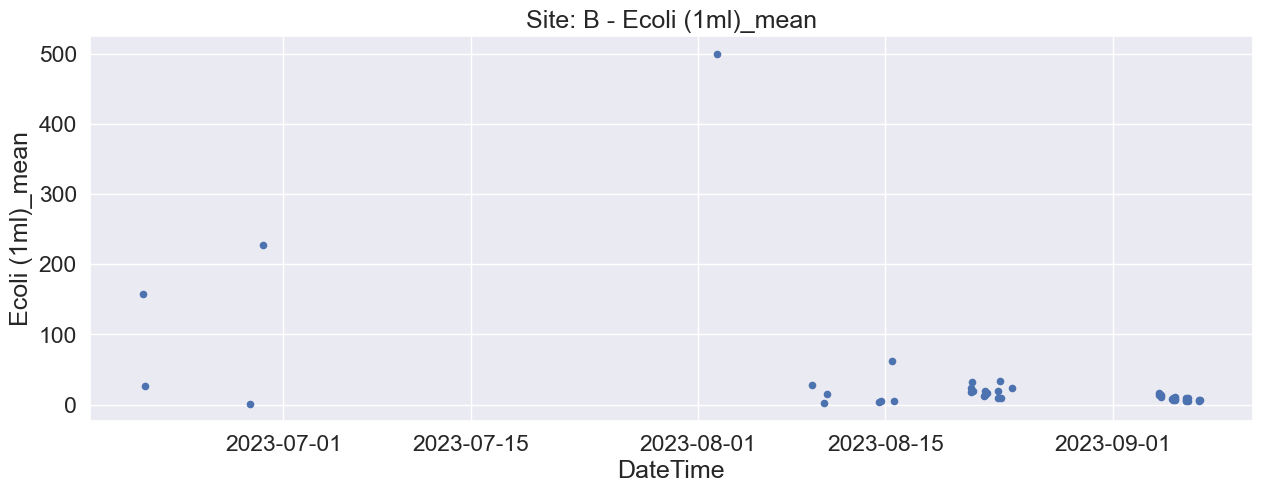

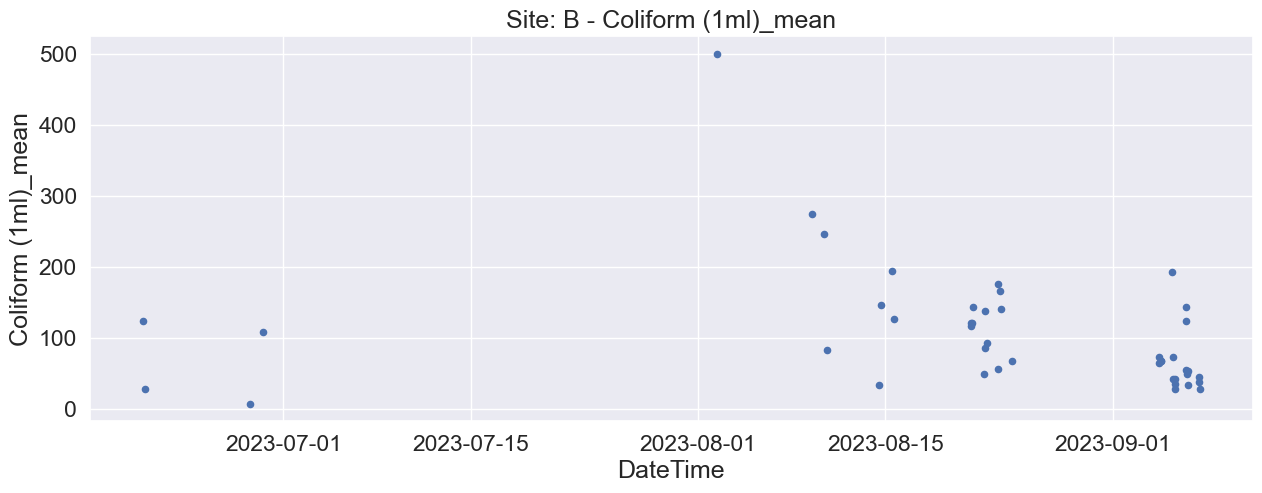

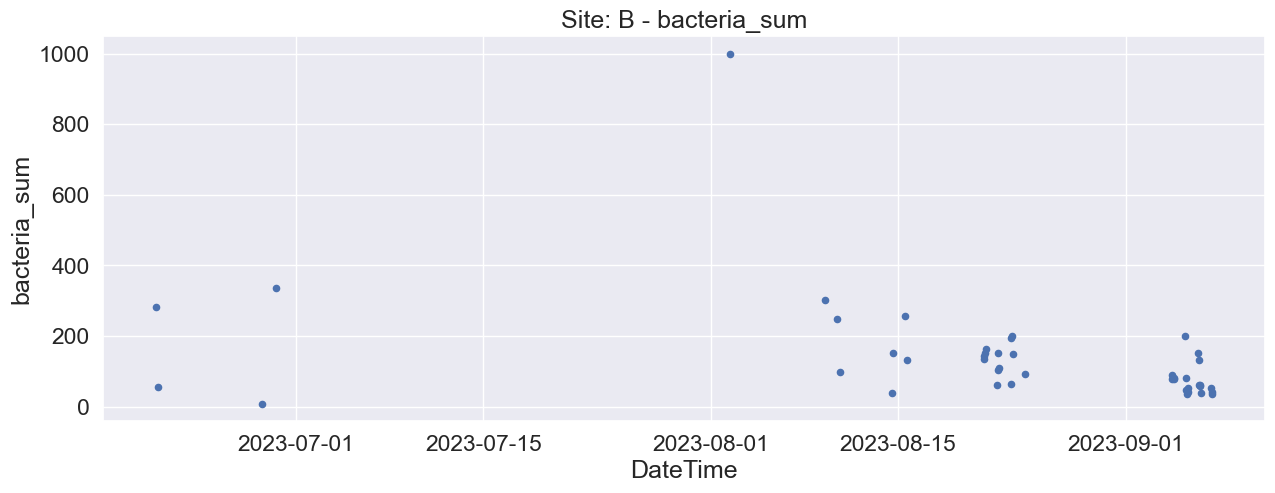

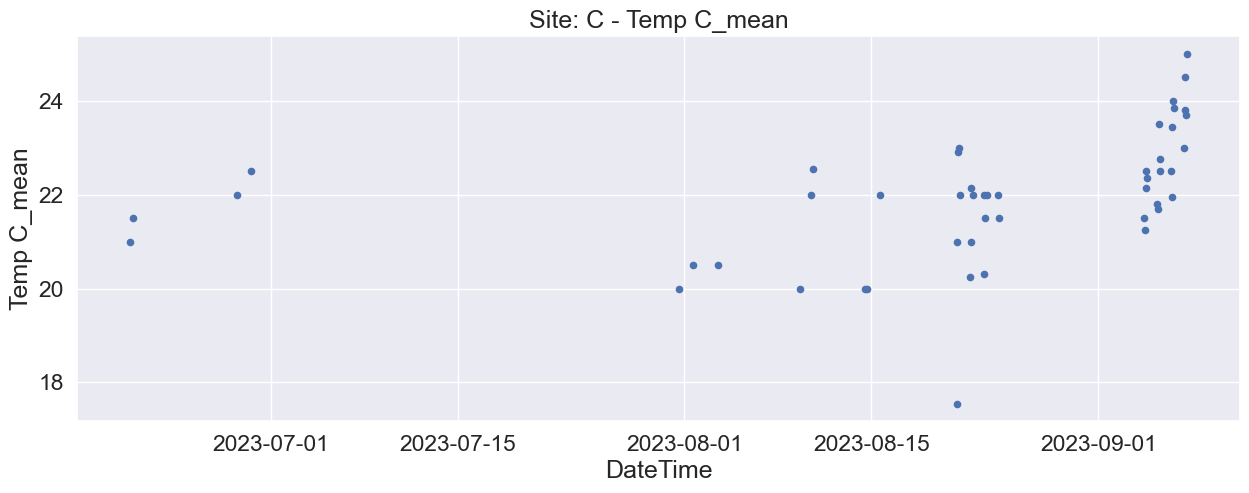

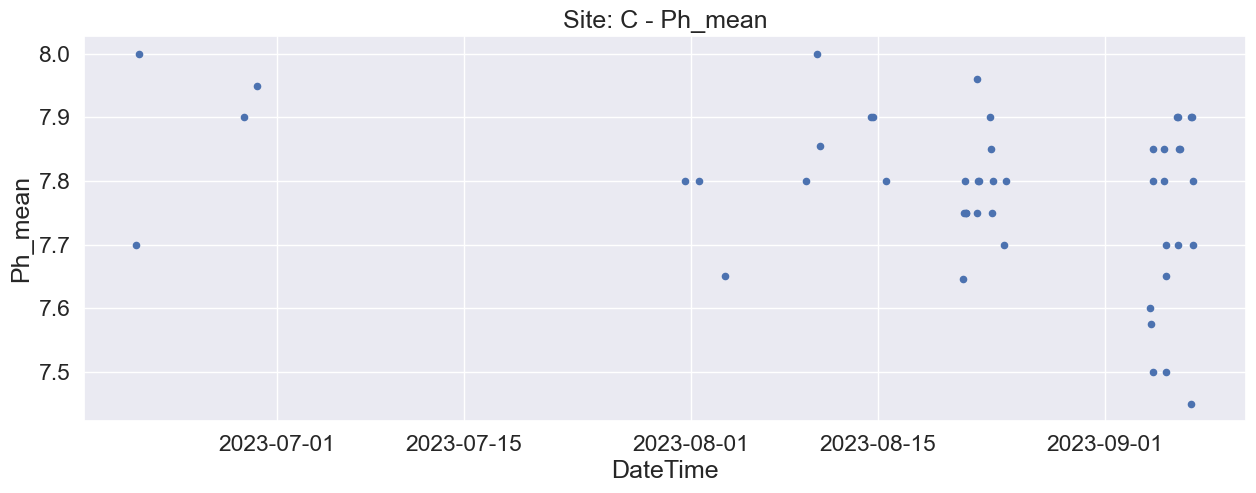

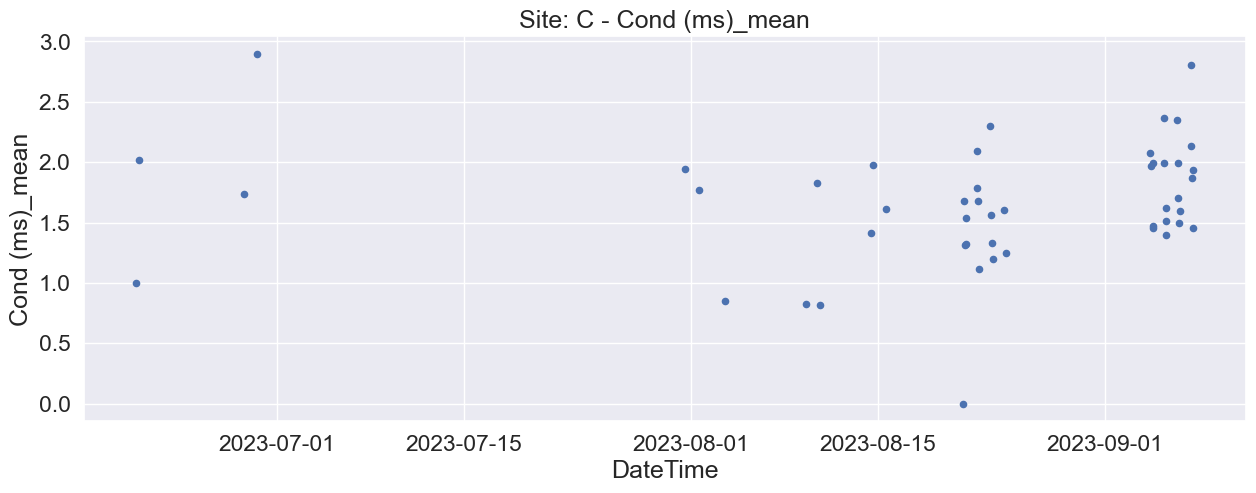

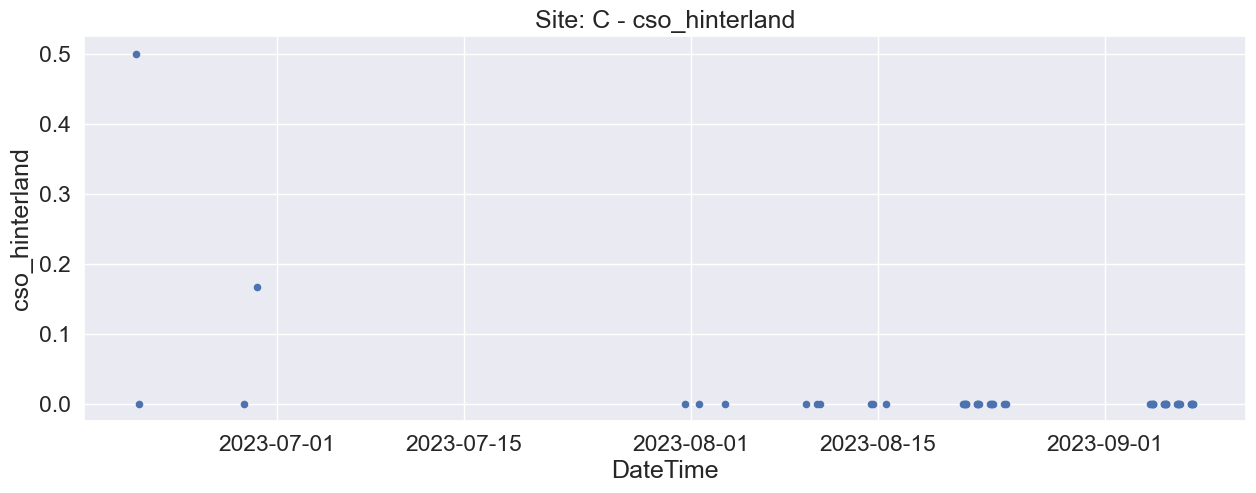

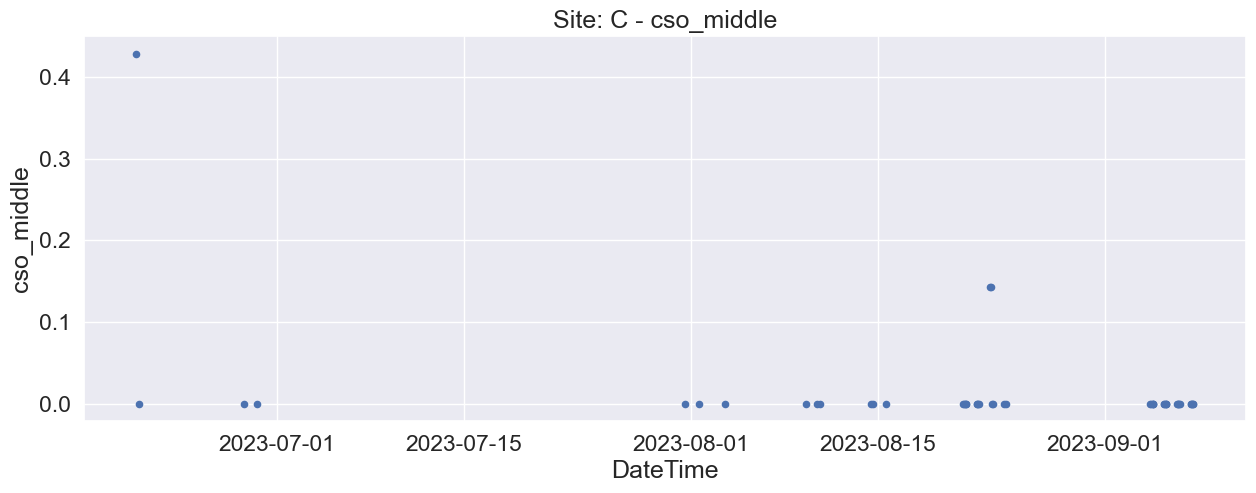

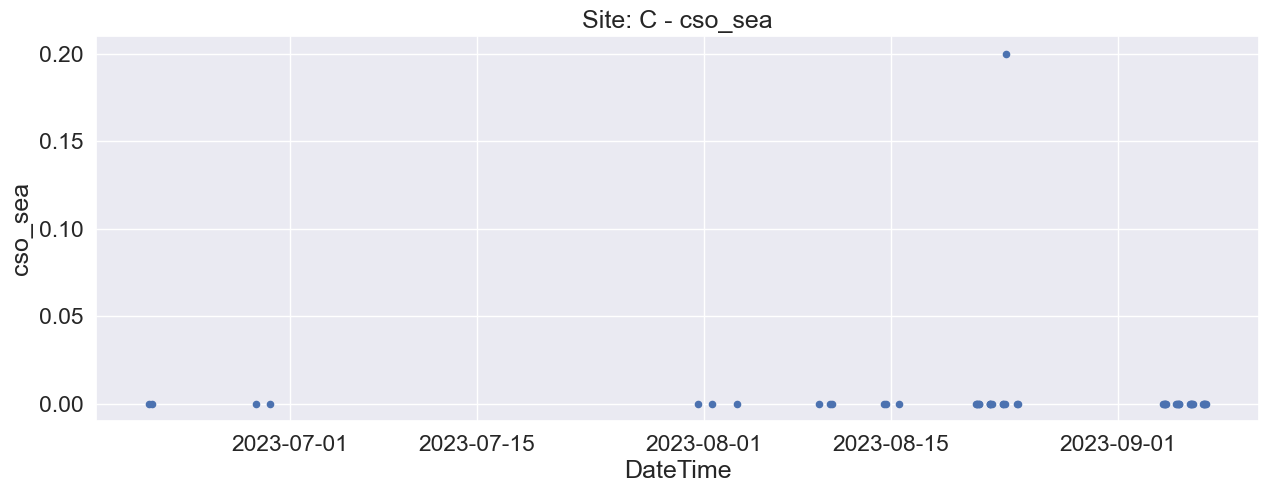

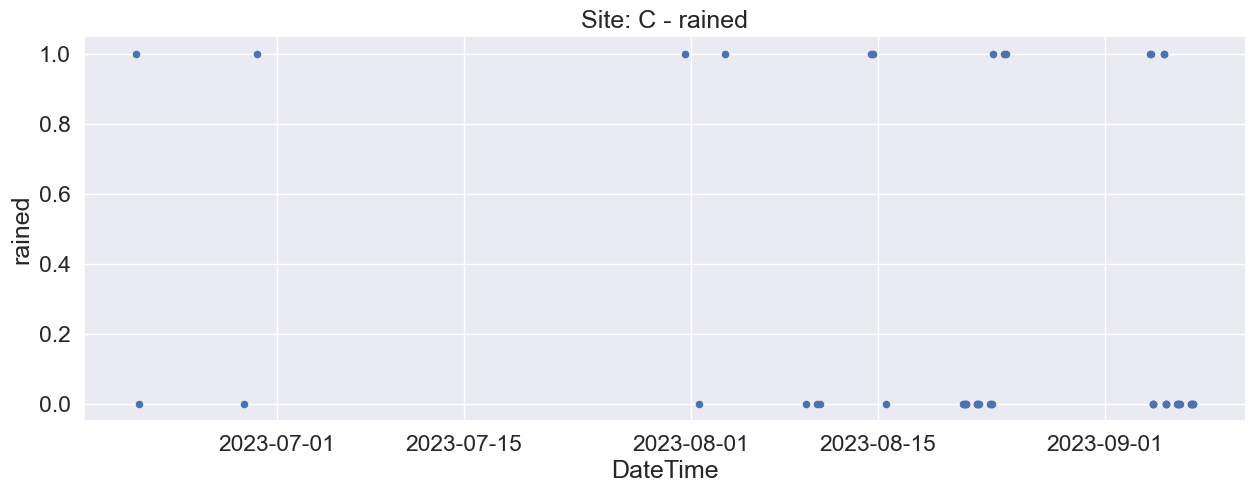

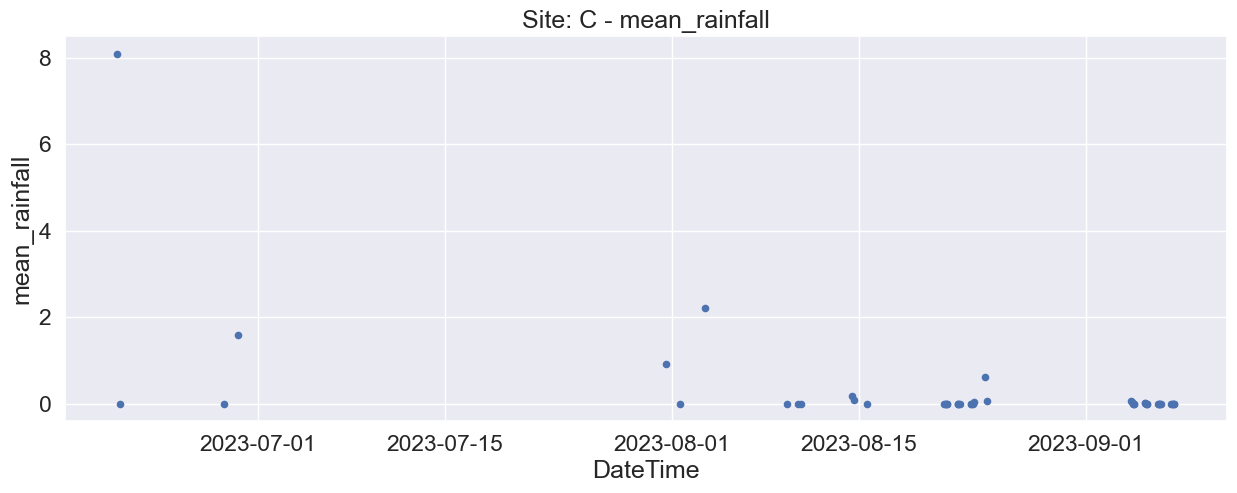

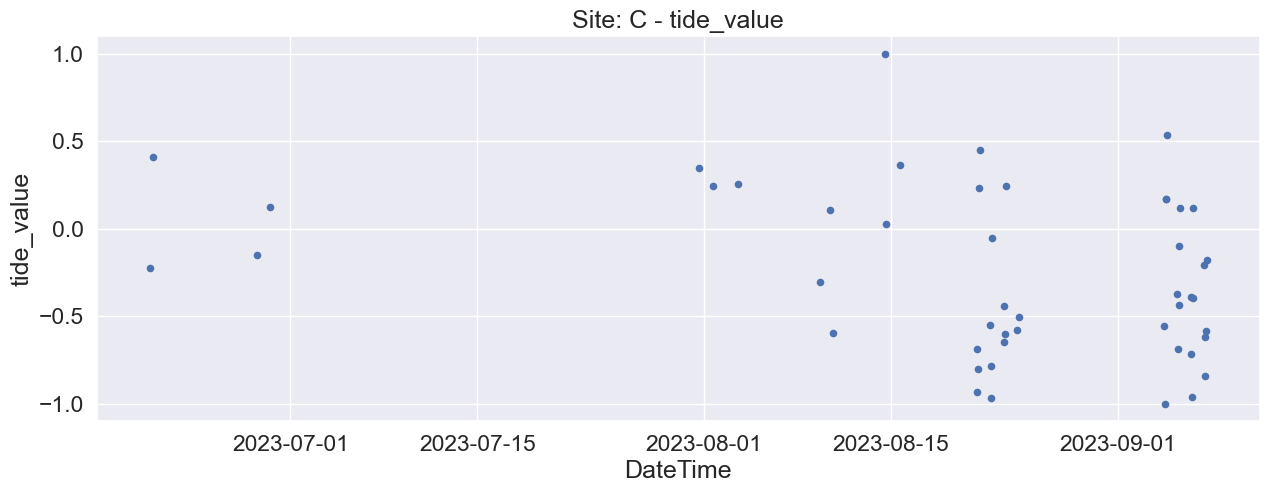

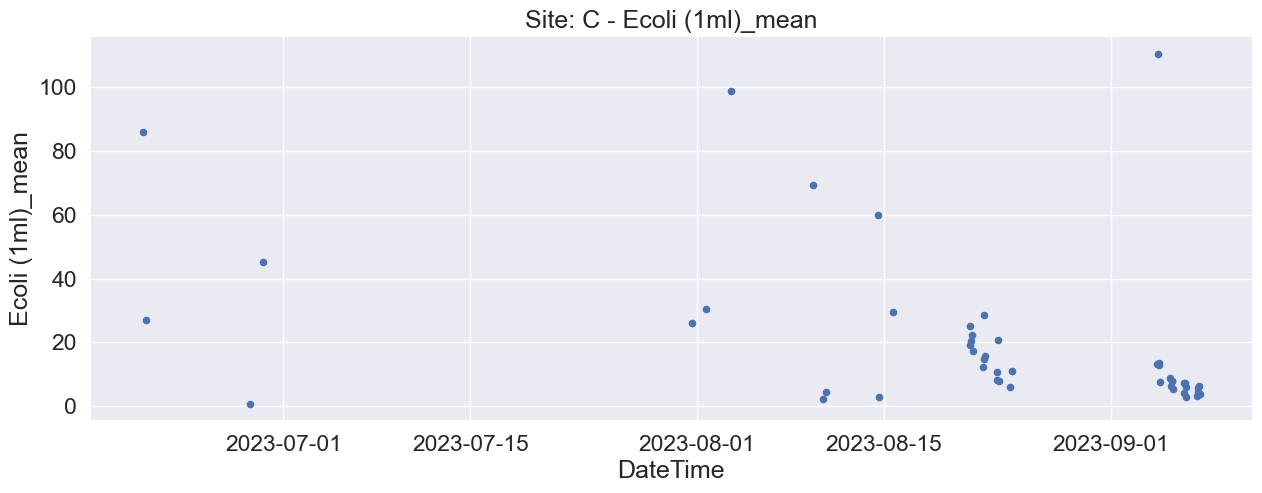

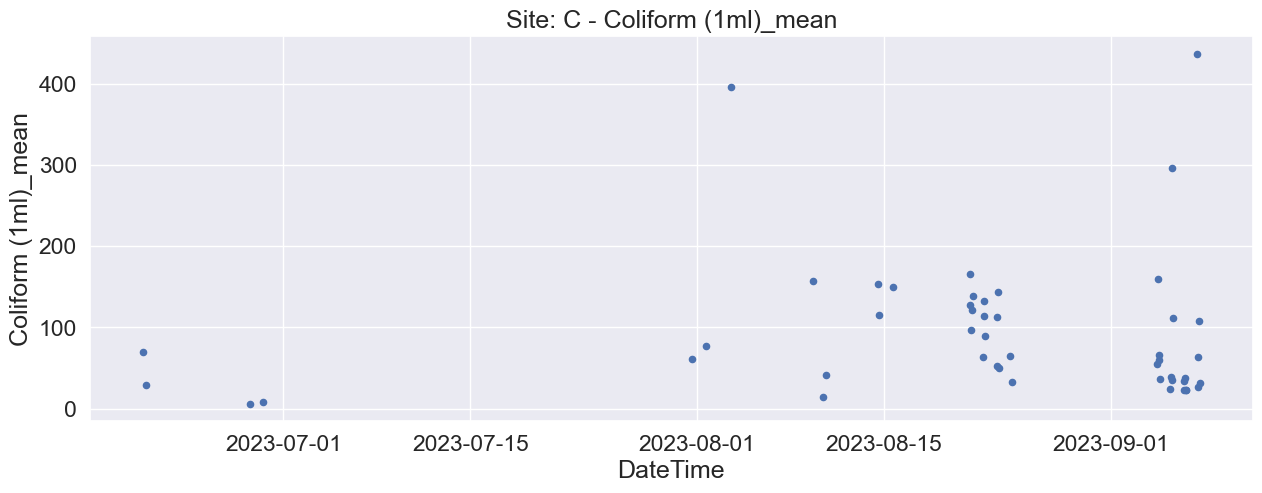

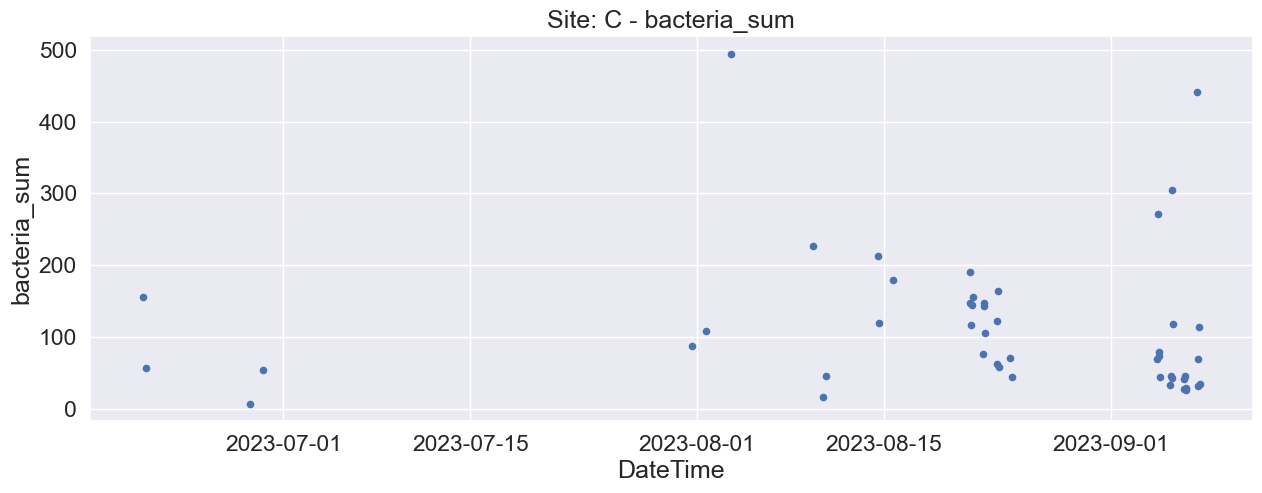

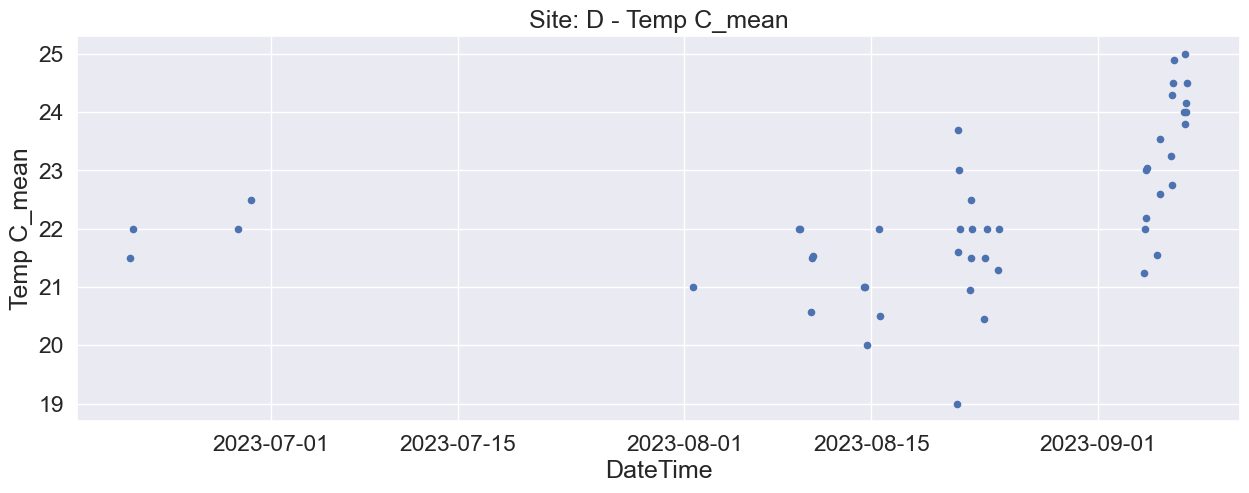

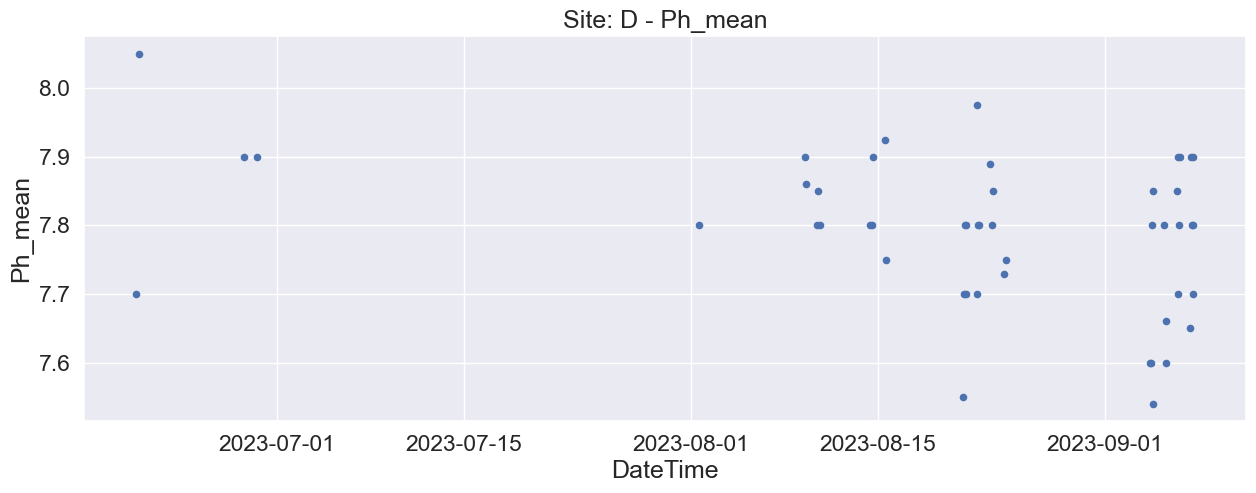

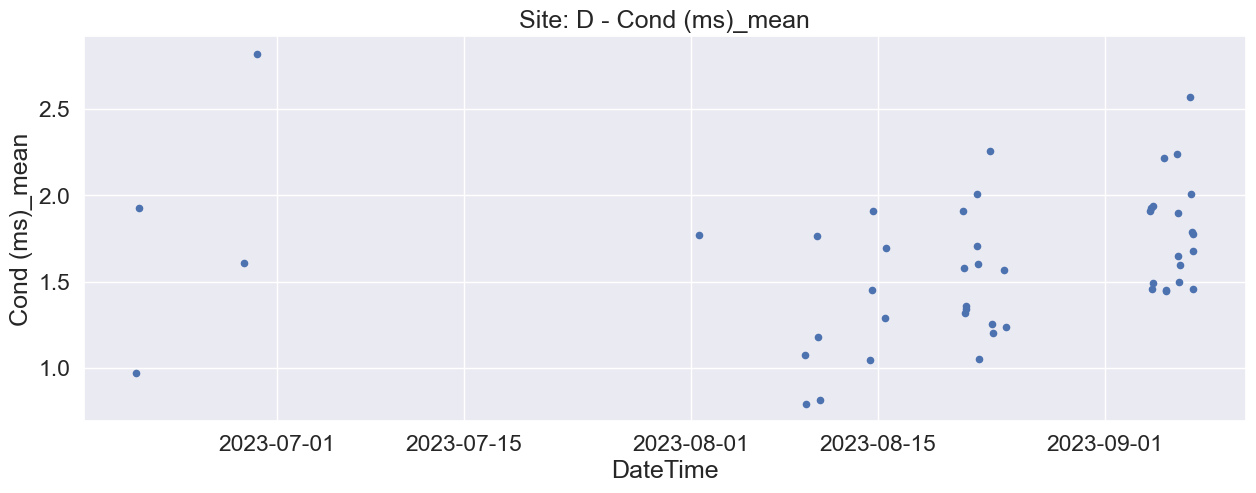

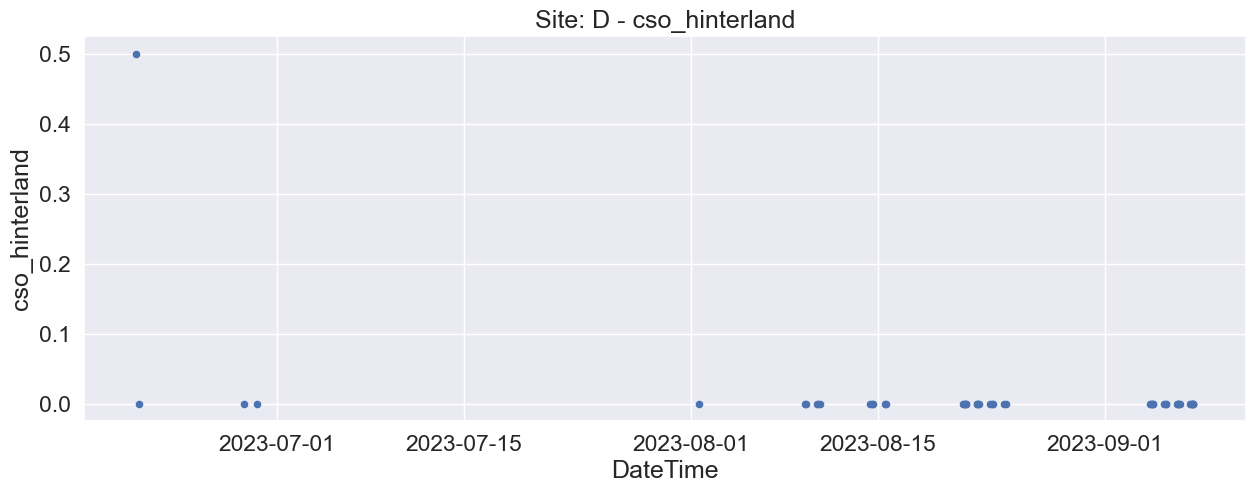

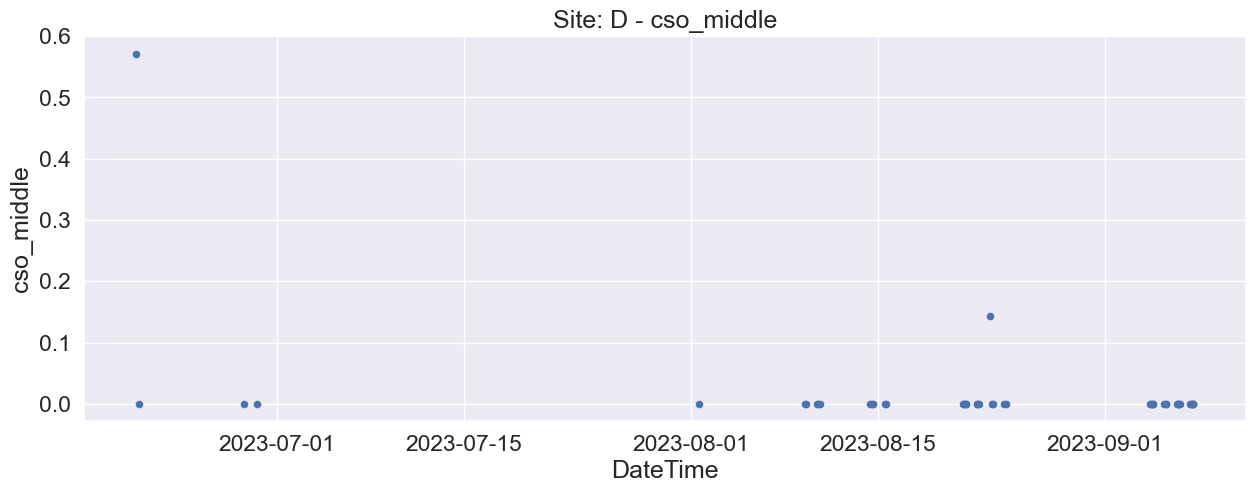

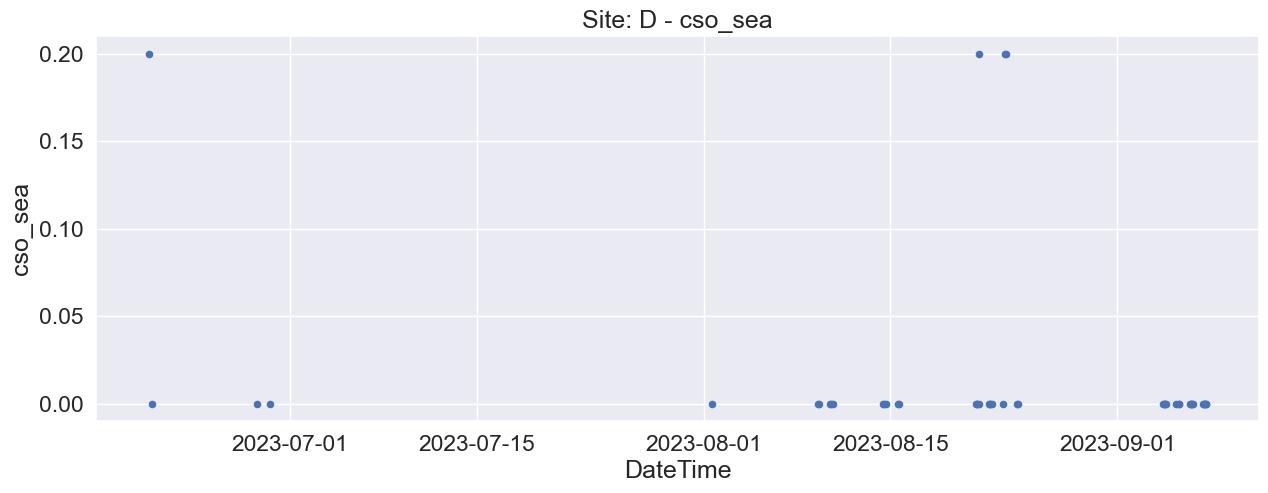

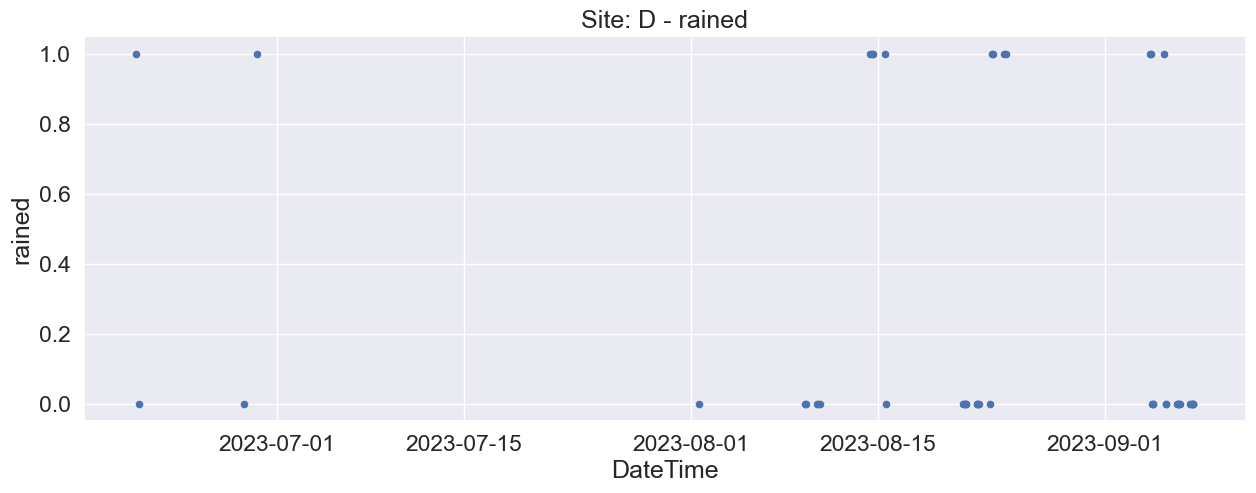

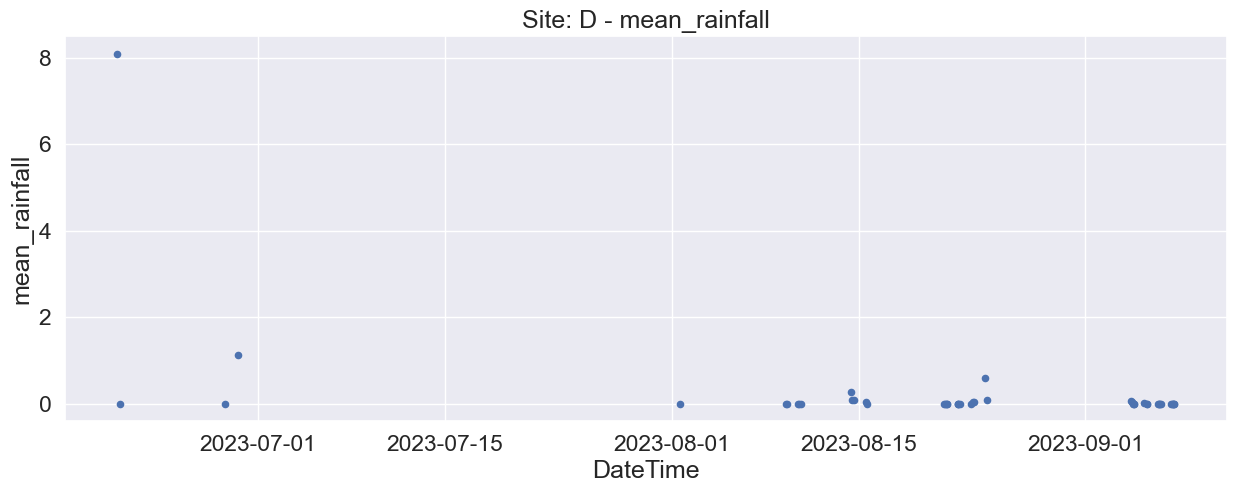

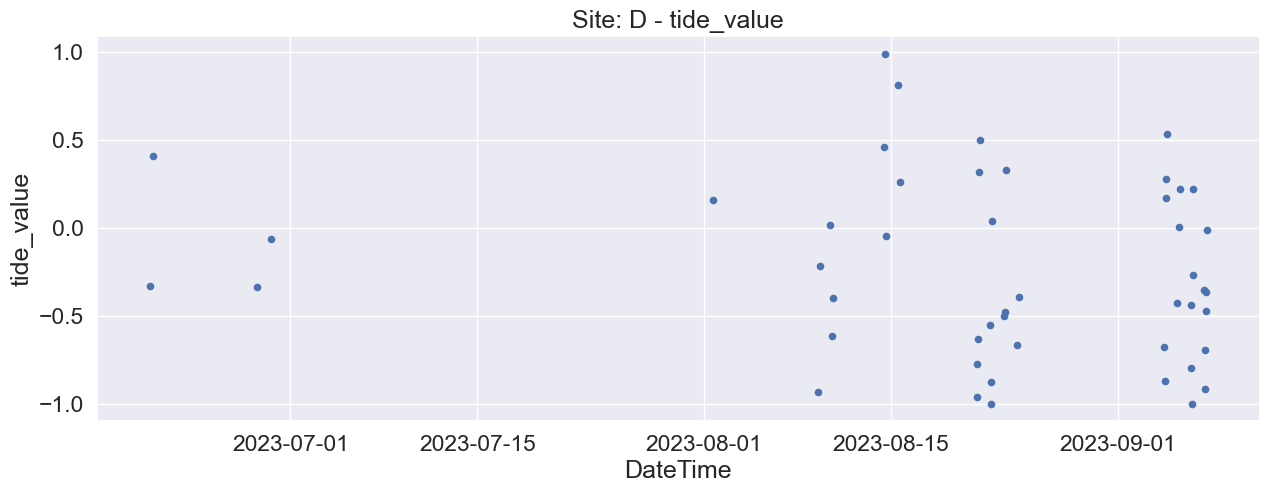

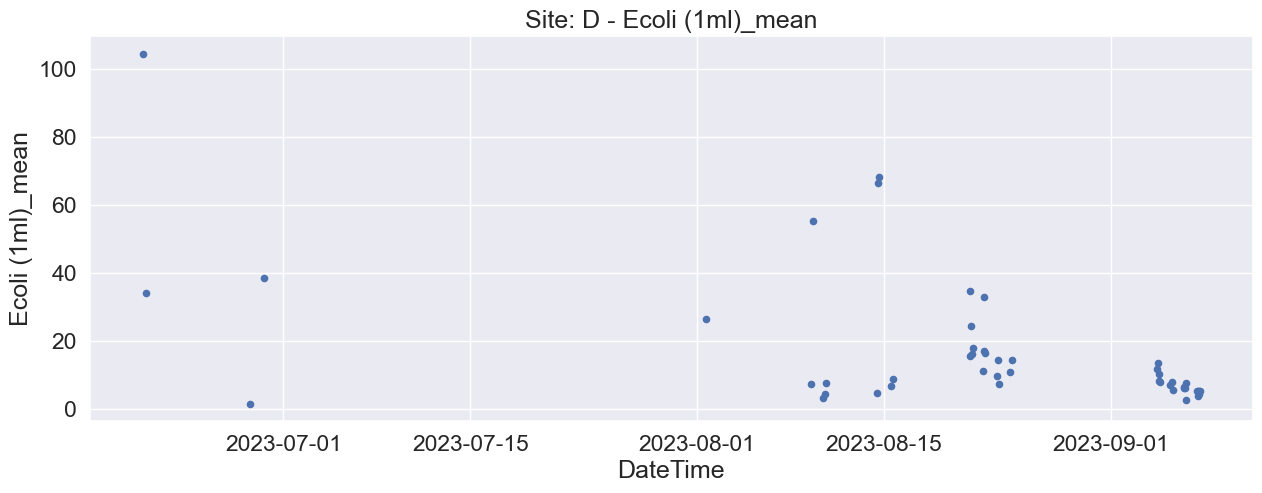

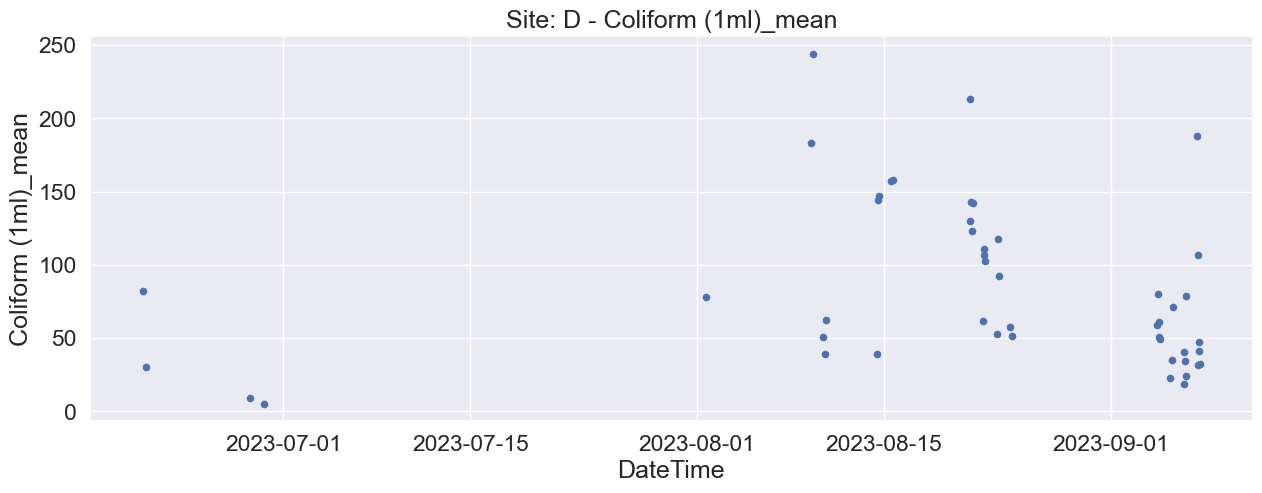

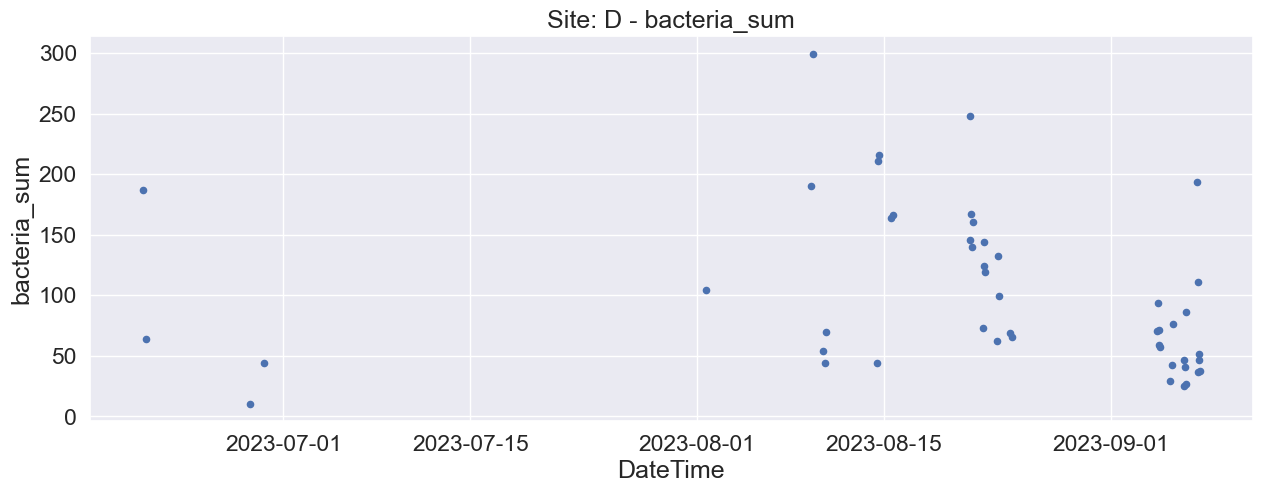

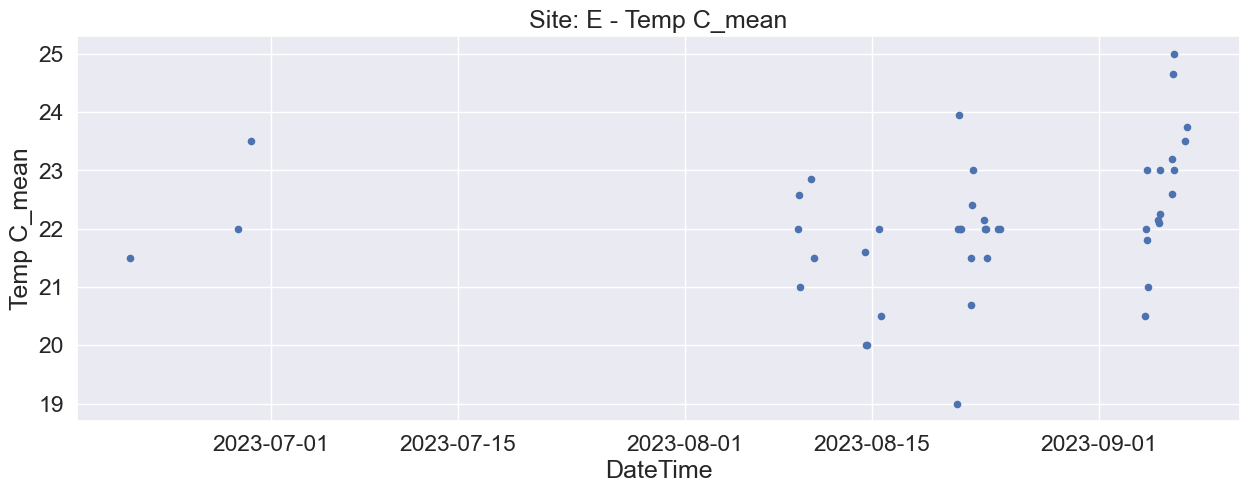

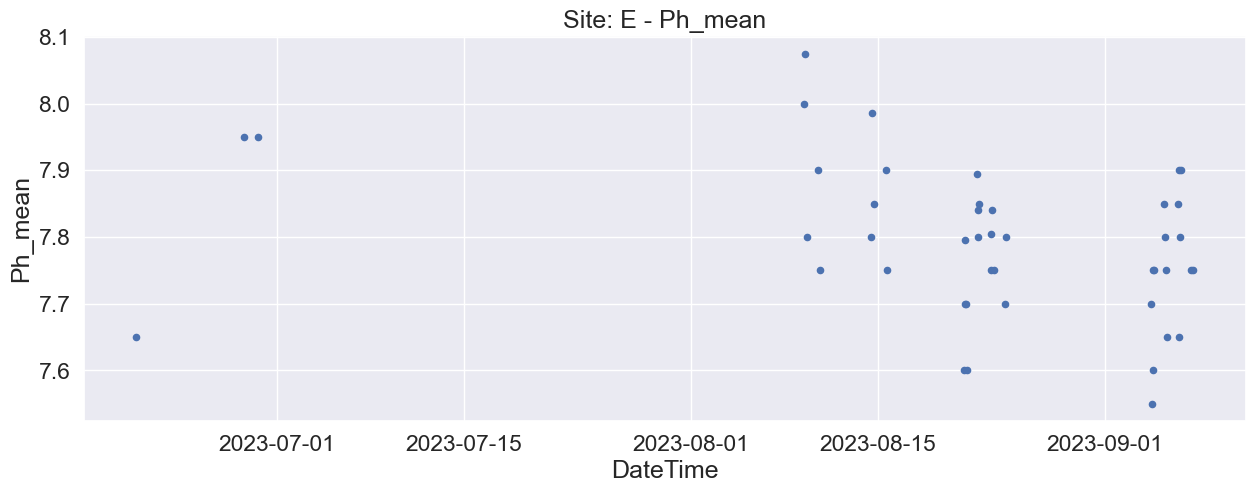

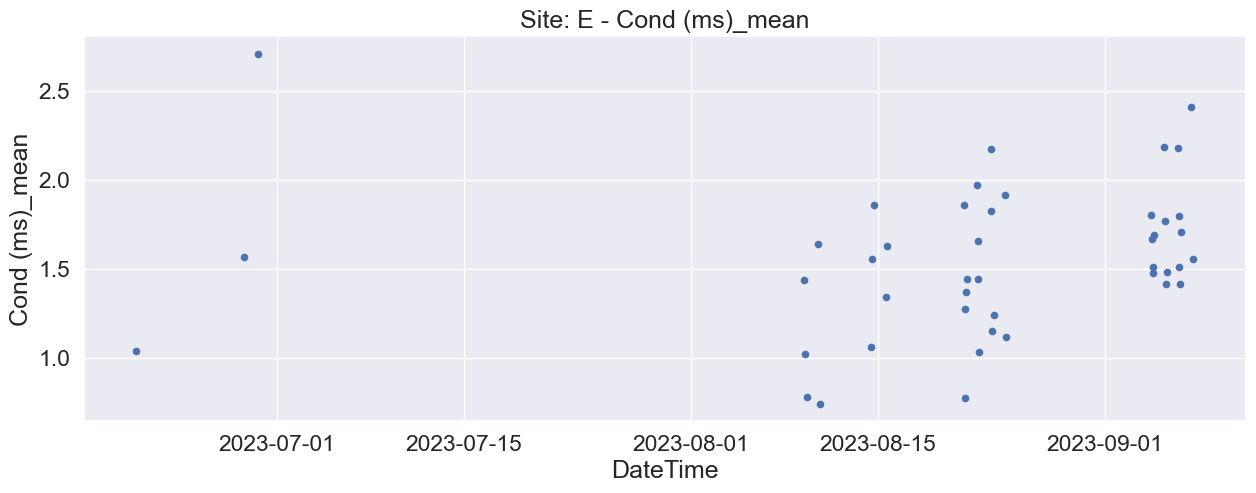

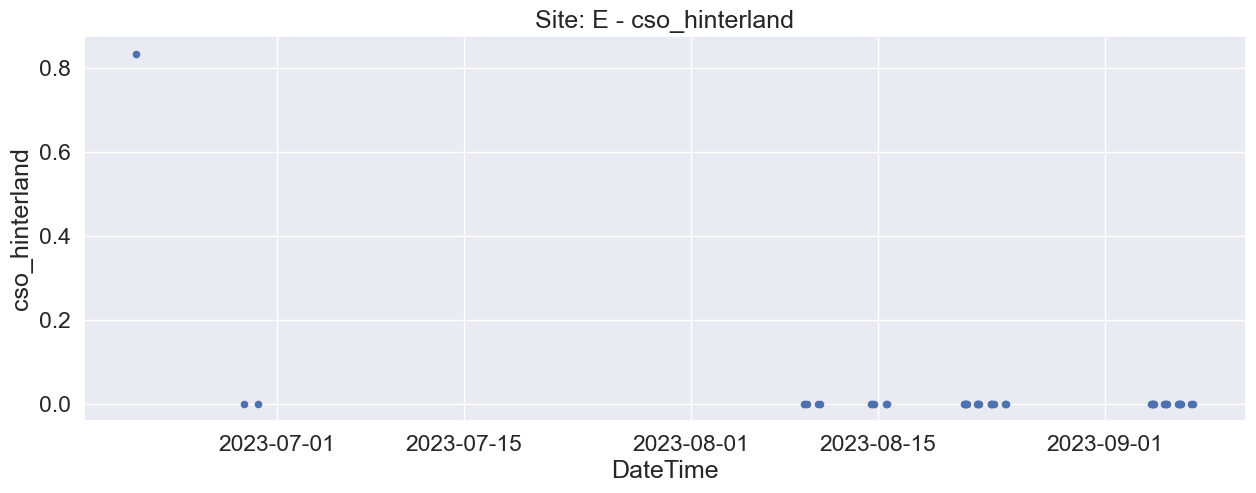

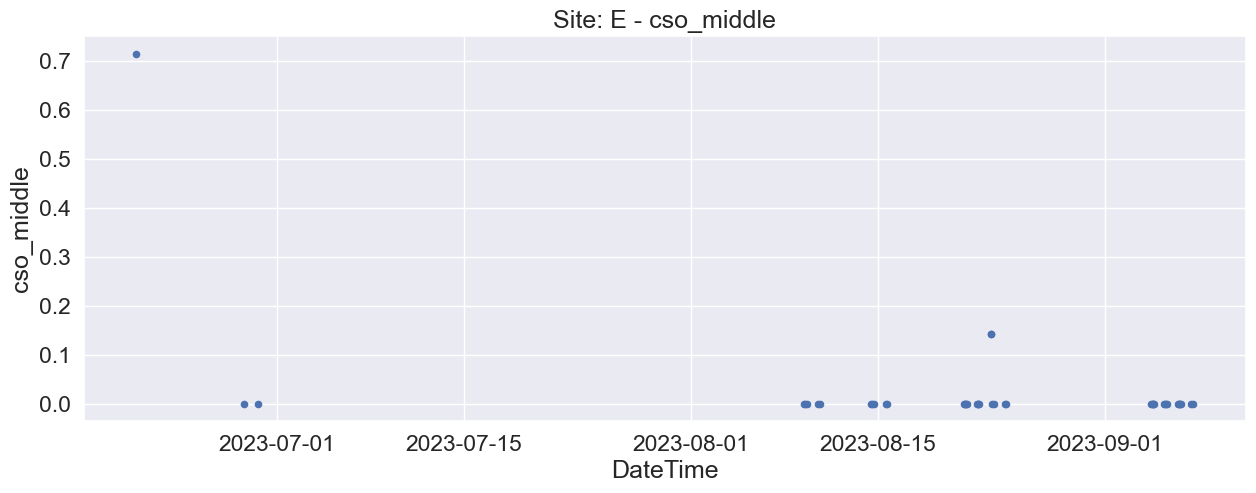

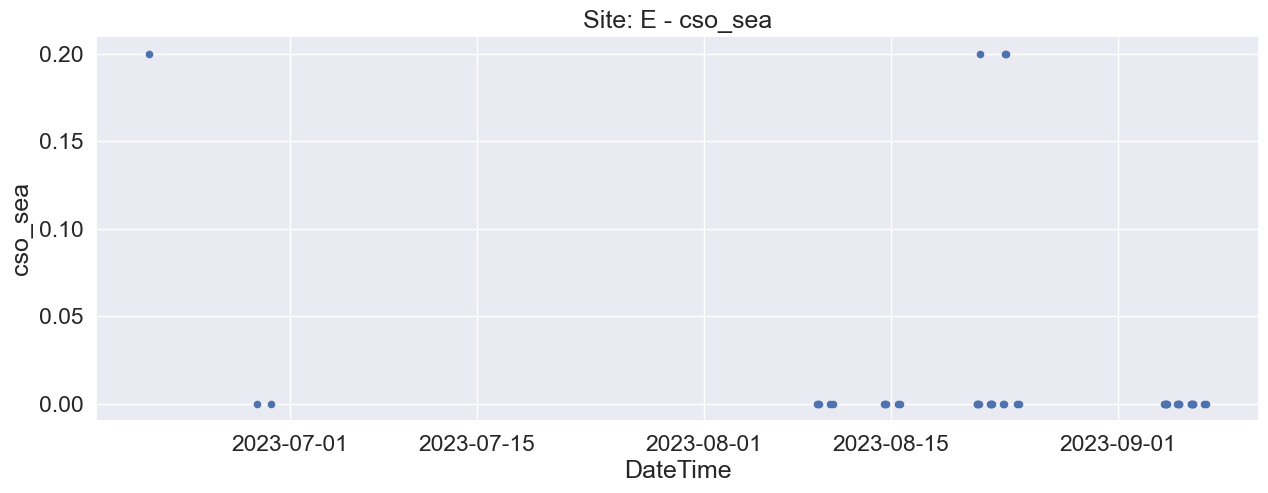

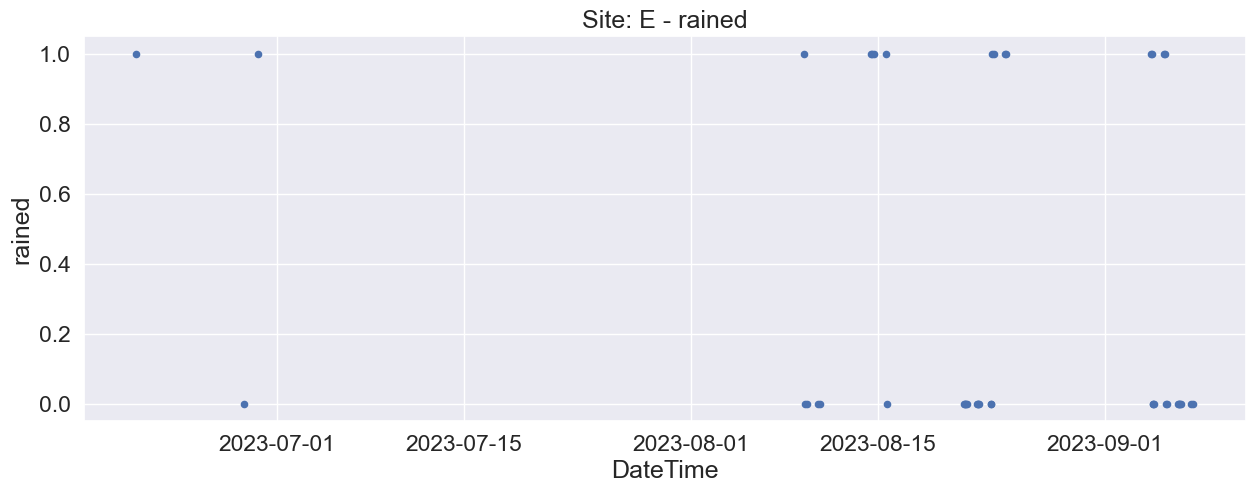

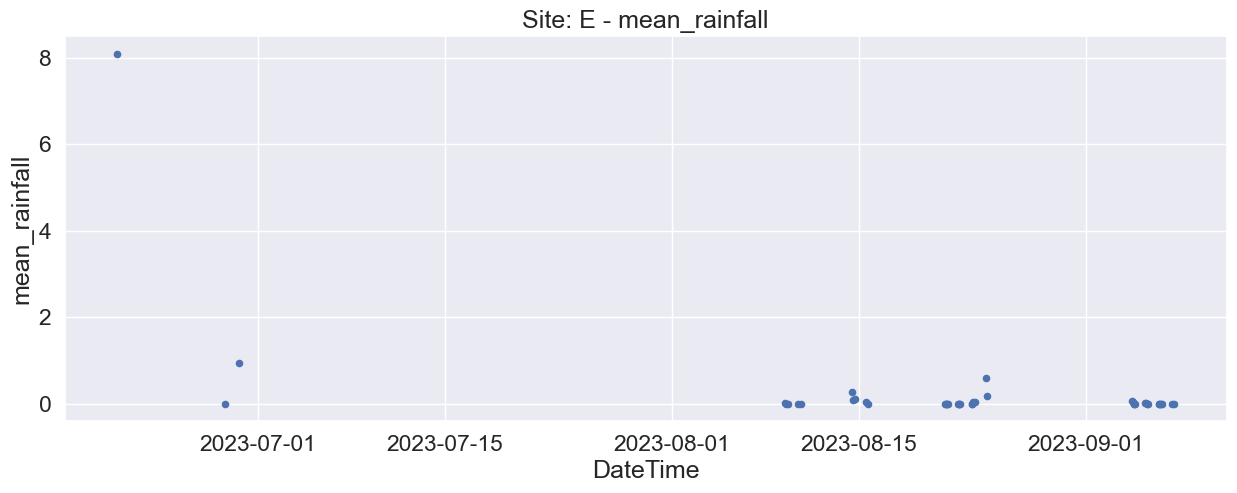

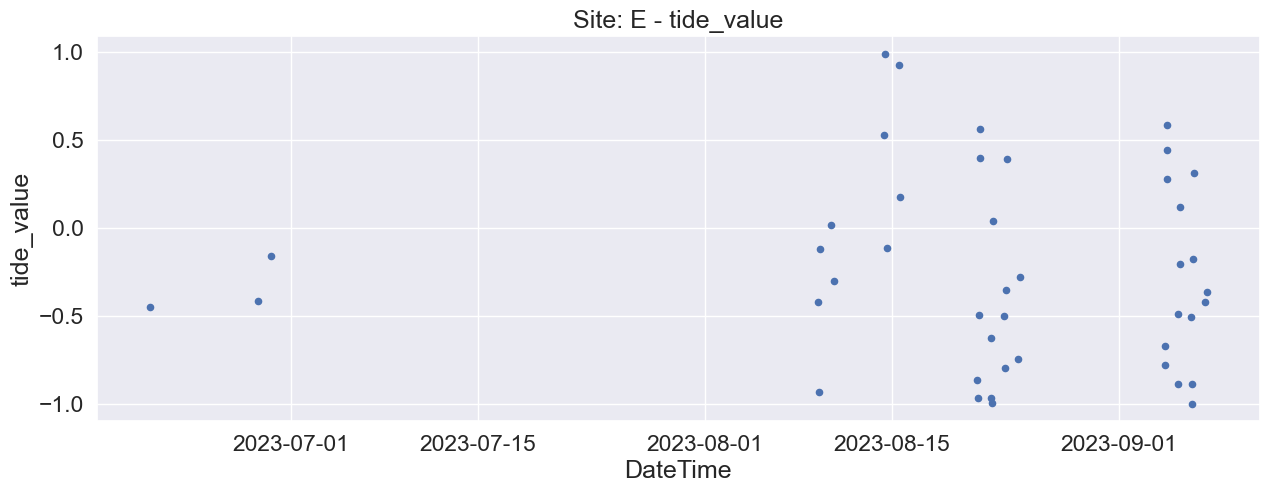

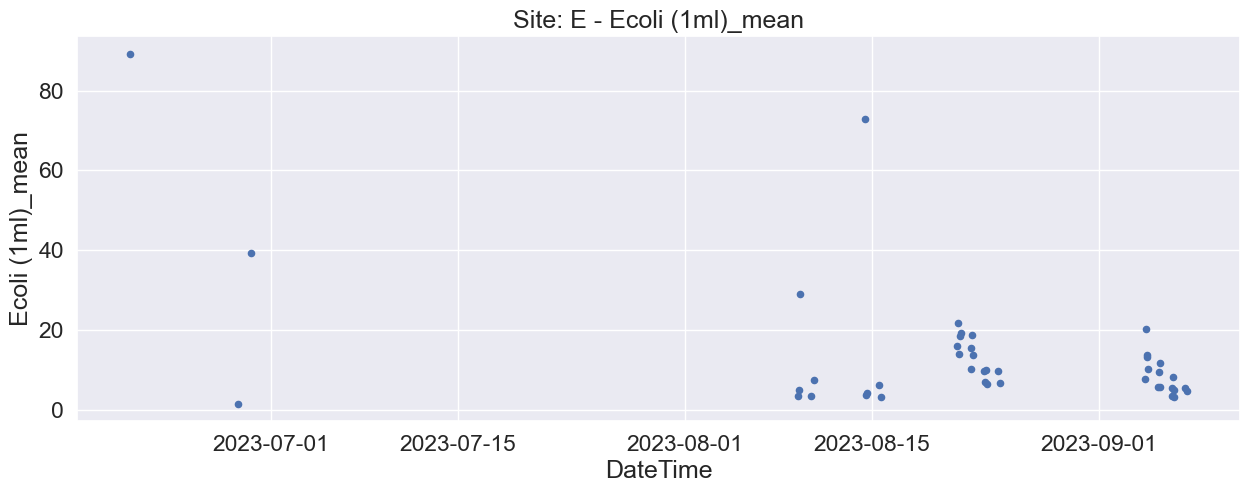

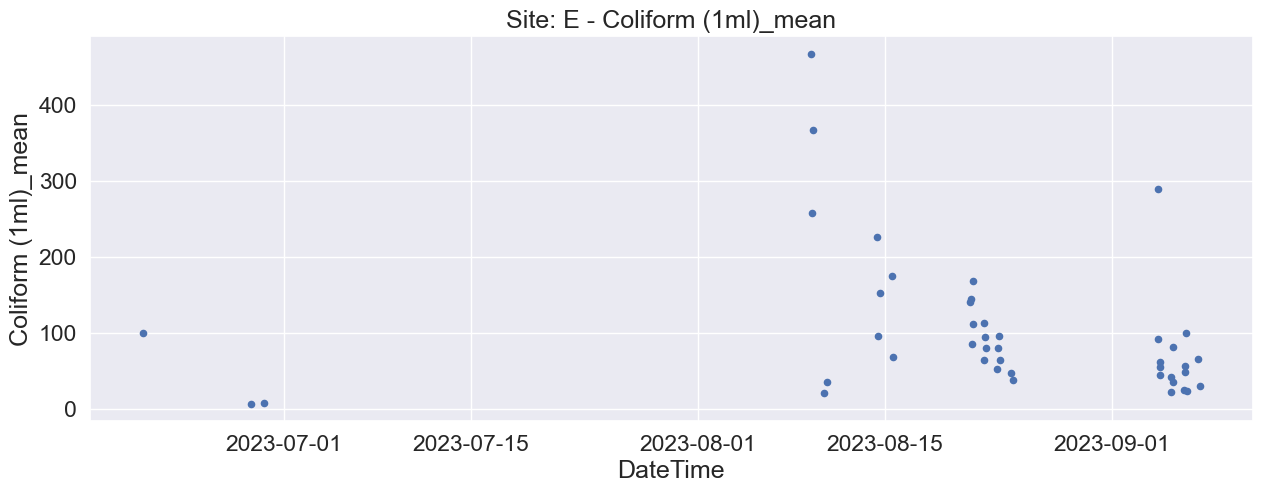

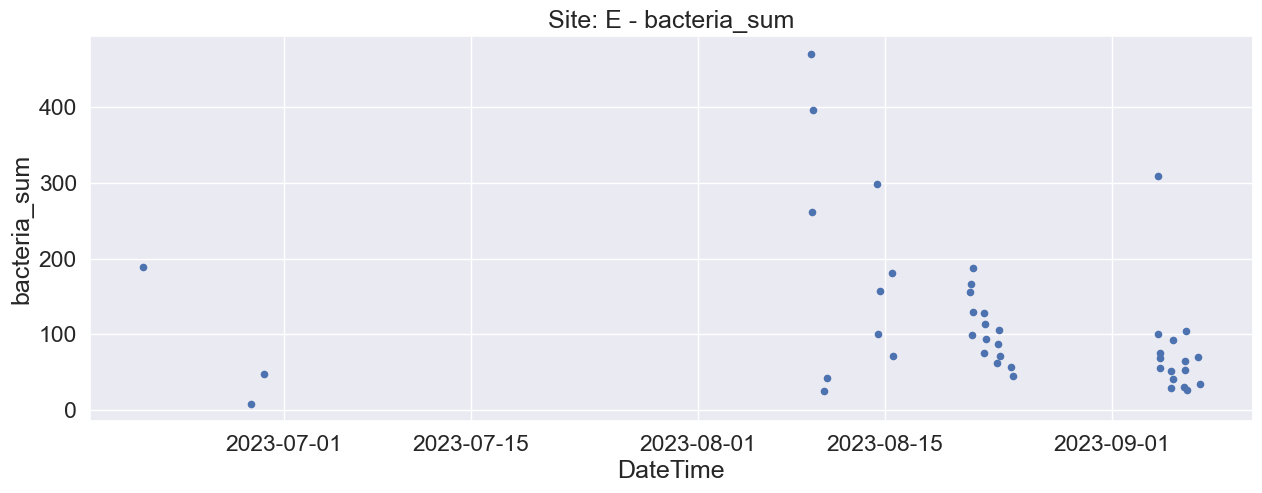

In [36]:
for site in site_dict:
    for col in analyze_columns:
        site_dict[site].plot(
            x="DateTime", y=col, figsize=(15, 5), grid=True, kind="scatter"
        )
        plt.title("Site: " + site + " - " + col)

# All Sites Data Visualization and Analysis

In [6]:
overall_df = dataset_df.drop(columns=["Site"])

## Correlation Matrix Heatmap

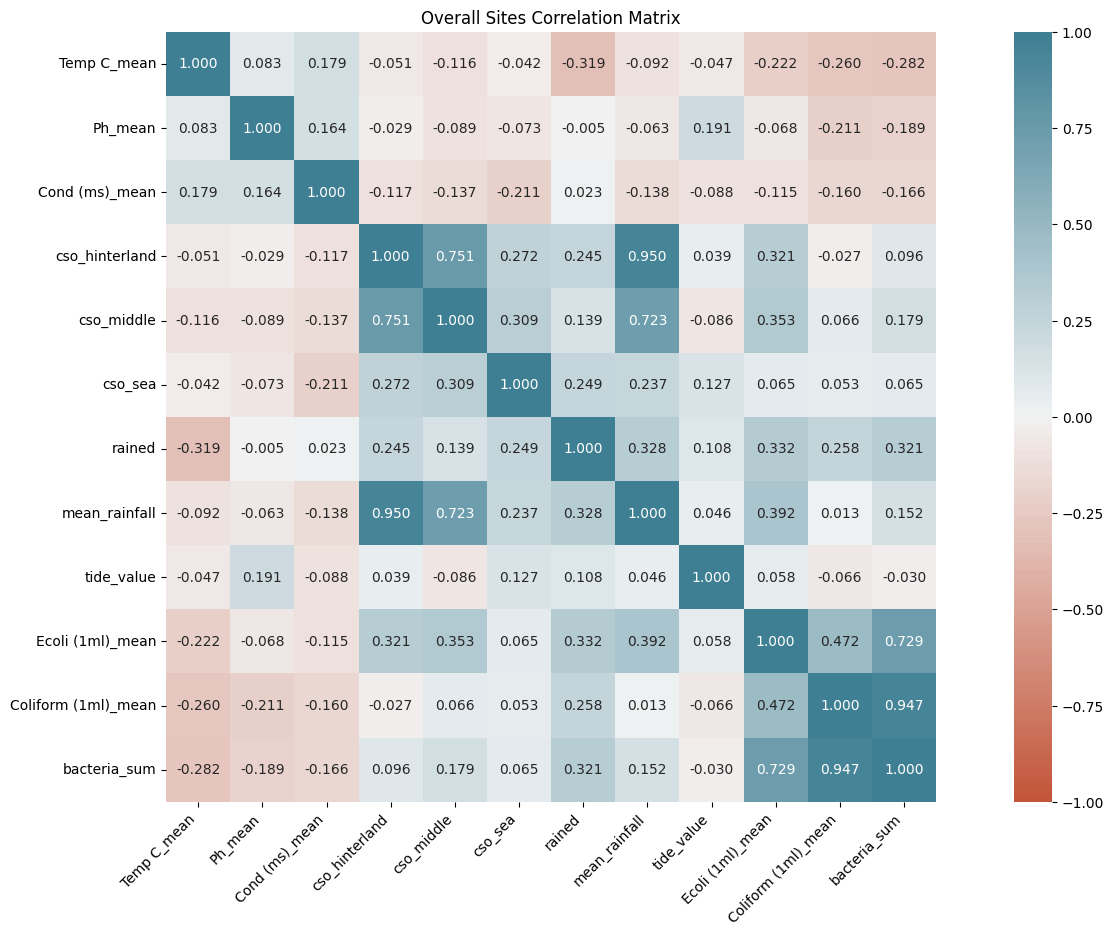

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))

corr = overall_df[analyze_columns].corr(method="pearson")


sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".3f",
)

ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45, horizontalalignment="right"
)

plt.title("Overall Sites Correlation Matrix")
plt.show()

## Boxplots

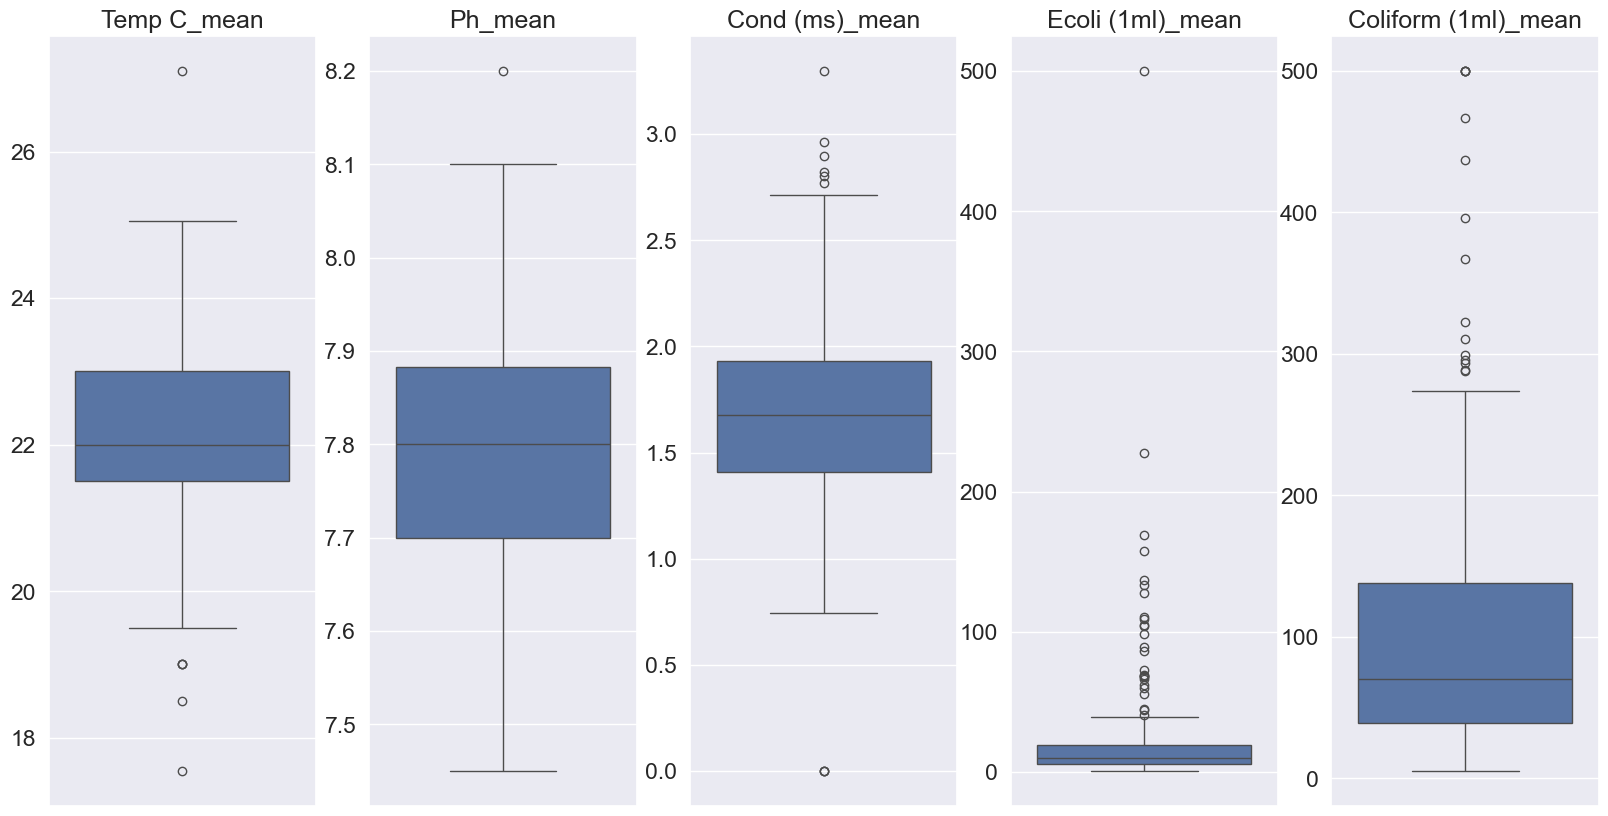

In [39]:
fig, axs = plt.subplots(1, len(boxplot_columns), figsize=(20, 10))
sns.set_theme(font_scale=1.5)
for col in boxplot_columns:
    sns.boxplot(
        y=overall_df[col],
        orient="v",
        ax=axs[boxplot_columns.index(col)],
    )
    axs[boxplot_columns.index(col)].set_title(col)
    # remove y axis label
    axs[boxplot_columns.index(col)].set_ylabel("")

<Figure size 1600x800 with 0 Axes>

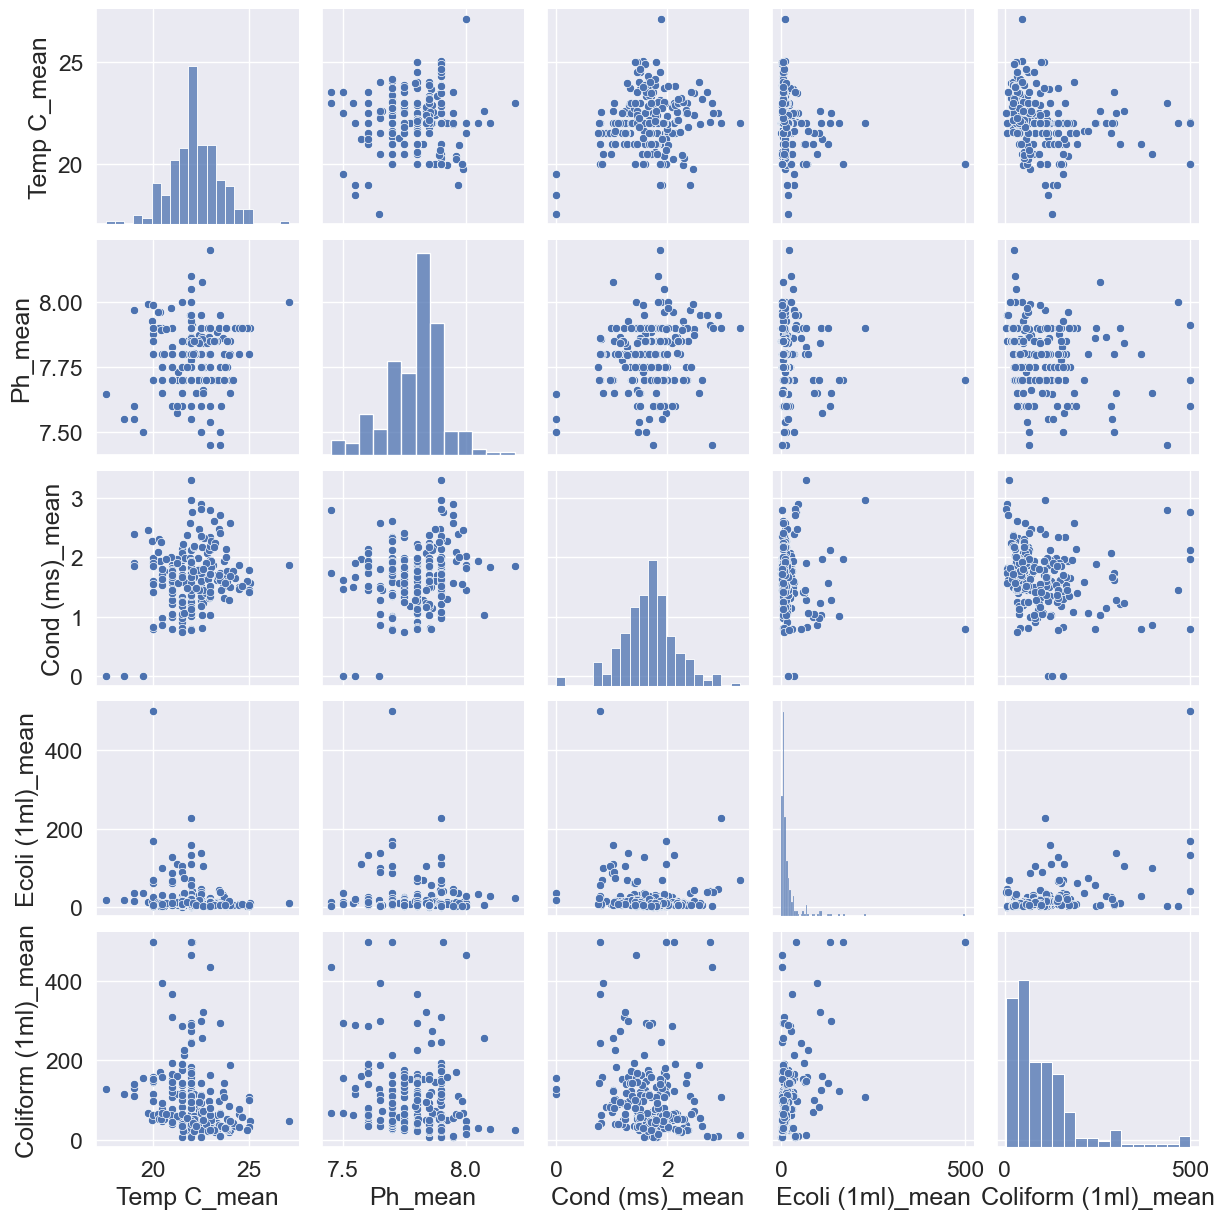

In [10]:
plt.figure(figsize=(20, 10), dpi=80)

sns.set_theme(font_scale=1.5)
sns.pairplot(data=overall_df[boxplot_columns])